# Data Exploration



## 1. Looking at the Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the cleaned datasets
data_train =  pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")

print(data_train.head())
#print(data_test.head())


   age         workclass  fnlwgt  education  educational_num  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital-status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             

In this cleaned datasets train and test, the income attribute were transformed 0 to be <=50k and 1 to be >50k

In [19]:
dfx = pd.DataFrame(data_train, columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num', 'marital-status', 'occupation', 'relationship','race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'], )
dfy = pd.DataFrame(data_train, columns = ['income'])

#print(data_train)
#print (dfx)
#print (dfy)


The content of this dataframe

In [20]:
data_train.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Looking at some stastistics of the dataframe - for the numeric attribute

In [21]:
data_train.shape

(32561, 15)

Looking at the data type of each attribute

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational_num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Looking at the statistics of the dataframe - for the numeric attributes

In [23]:
data_num = data_train.drop(["educational_num","income"], axis=1)
#axis=1: we want to drop columns rather than rows
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


Looking at some statistics of the dataframe - for the categorical attribute

In [24]:
data_train.describe(include=["O"])
#the ["O"] is to include the parameter only column with dtype "object"
#i.e., columns that contain string or mixed data types

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


## 2. Visualizing the Data Attributes and its Correlation

Adapted from kaggle: [Simple EDA for Beginner](https://www.kaggle.com/code/alokevil/simple-eda-for-beginners#5.-EDA)

### 2.1 Distribution for numeric attributes

This will include six attribute which are:

1. age
2. fnlwgt
3. education-num
4. hours-per-week
5. capital-gain
6. capital-loss

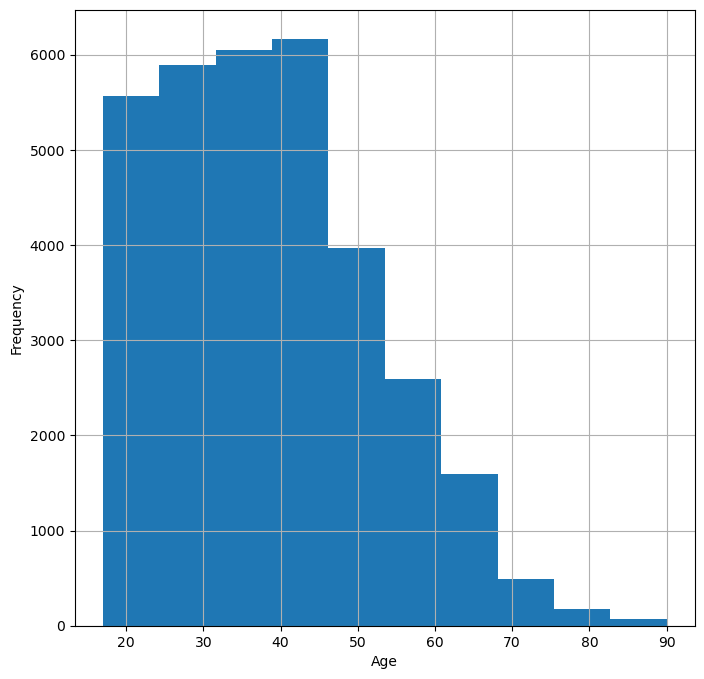

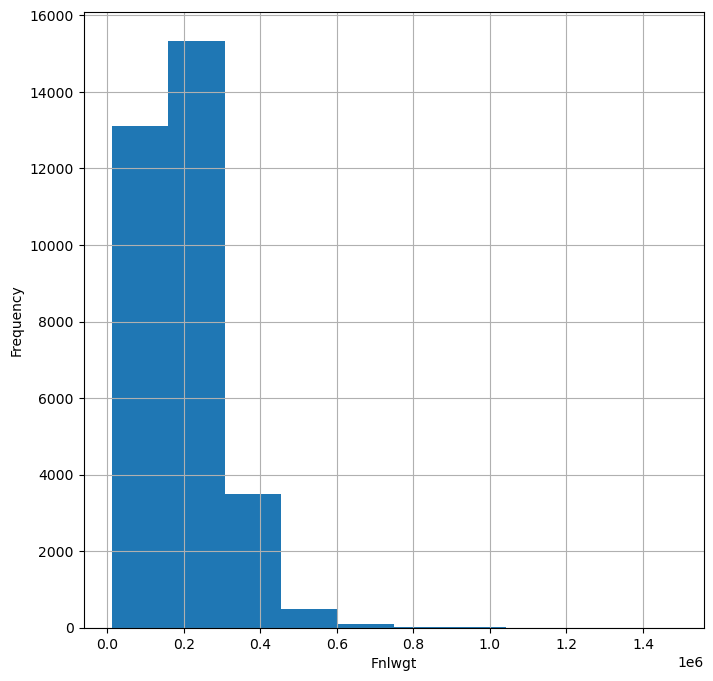

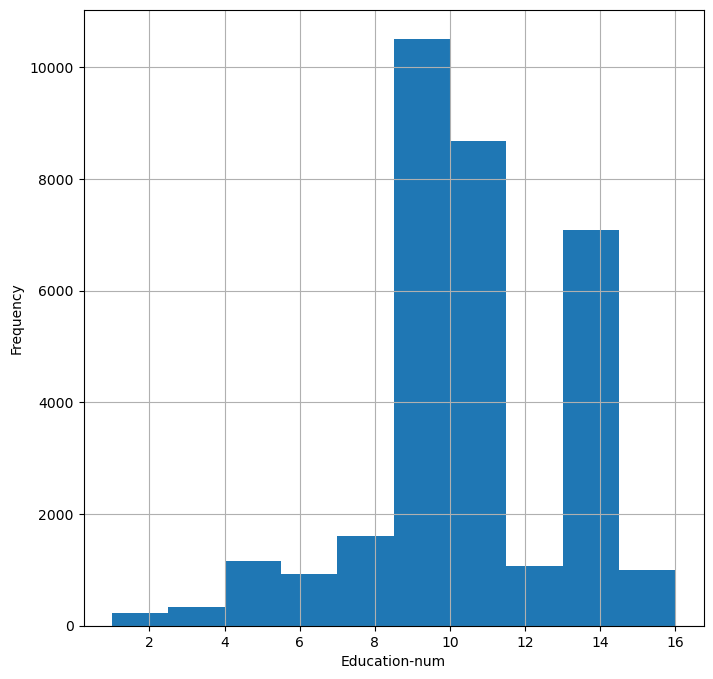

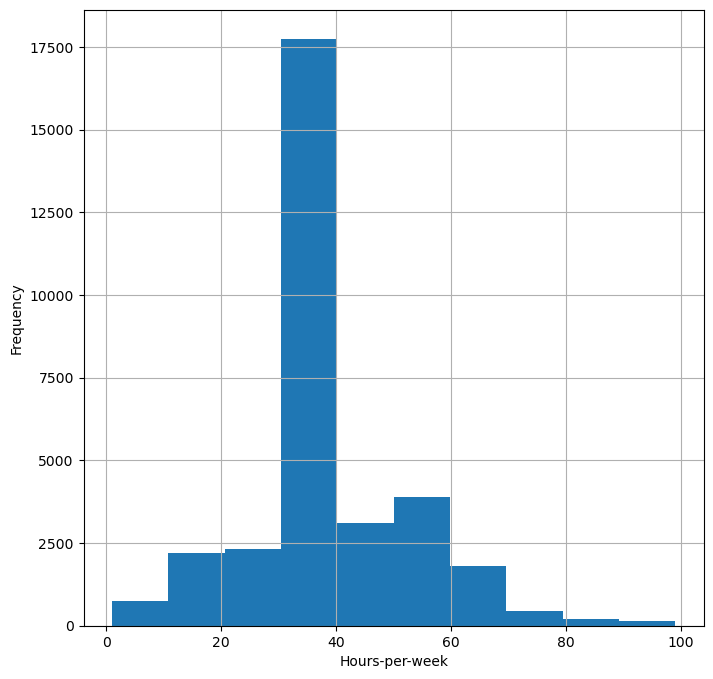

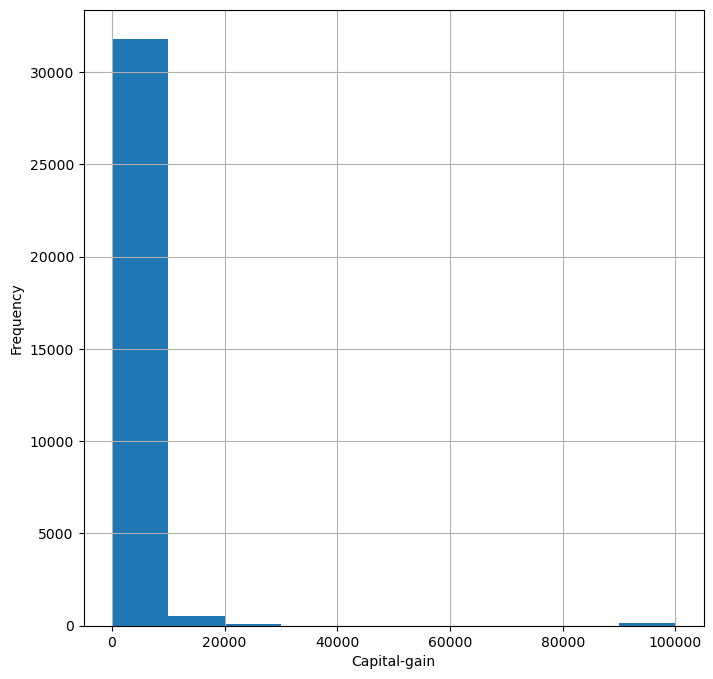

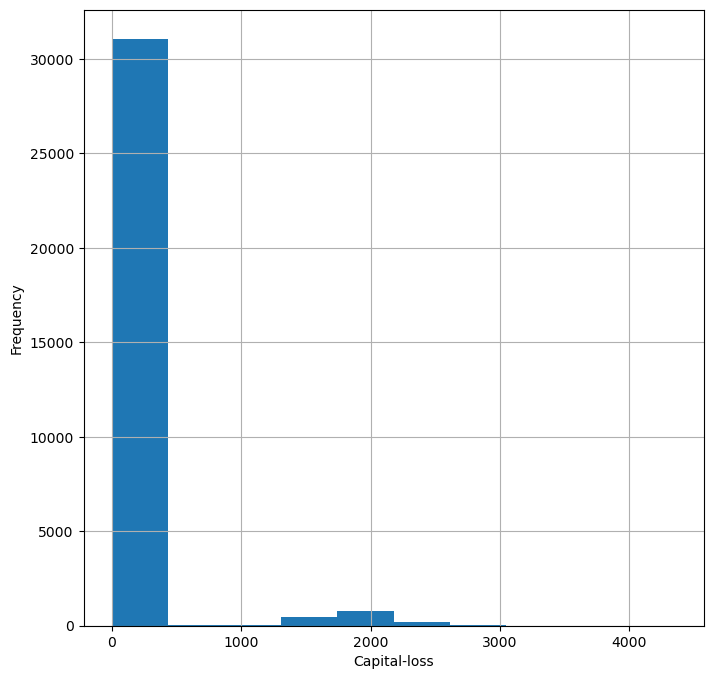

In [25]:
#age
data_train['age'].hist(figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('age_histogram.jpg') -dont know how to output to the right folder

#fnlwgt
data_train['fnlwgt'].hist(figsize=(8,8))
plt.xlabel('Fnlwgt')
plt.ylabel('Frequency')
plt.show()

#educational-num
data_train['educational_num'].hist(figsize=(8,8))
plt.xlabel('Education-num')
plt.ylabel('Frequency')
plt.show()

#hours-per-week
data_train['hours-per-week'].hist(figsize=(8,8))
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.show()

#capital-gain
data_train['capital-gain'].hist(figsize=(8,8))
plt.xlabel('Capital-gain')
plt.ylabel('Frequency')
plt.show()

#capital-loss
data_train['capital-loss'].hist(figsize=(8,8))
plt.xlabel('Capital-loss')
plt.ylabel('Frequency')
plt.show()

### 2.2 Distribution for categorical attribute

This include 8 attribute which are:

1. workclass
2. education
3. marital-status
4. occupation
5. relationship
6. race
7. sex
8. native country

education-num too? - (i think educationa and education-num is redundant)


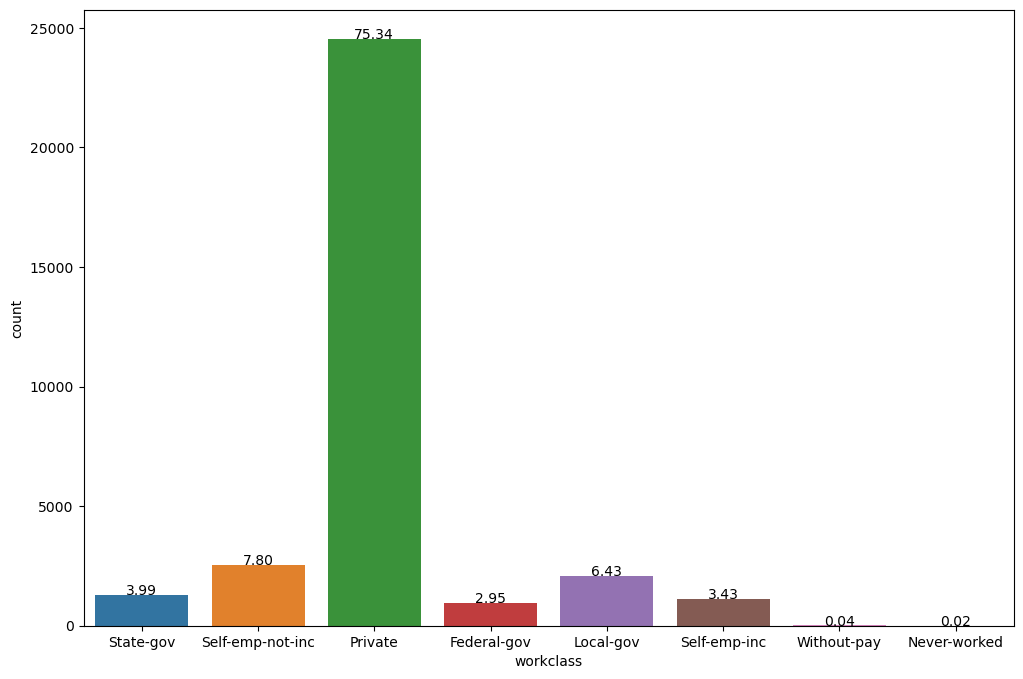

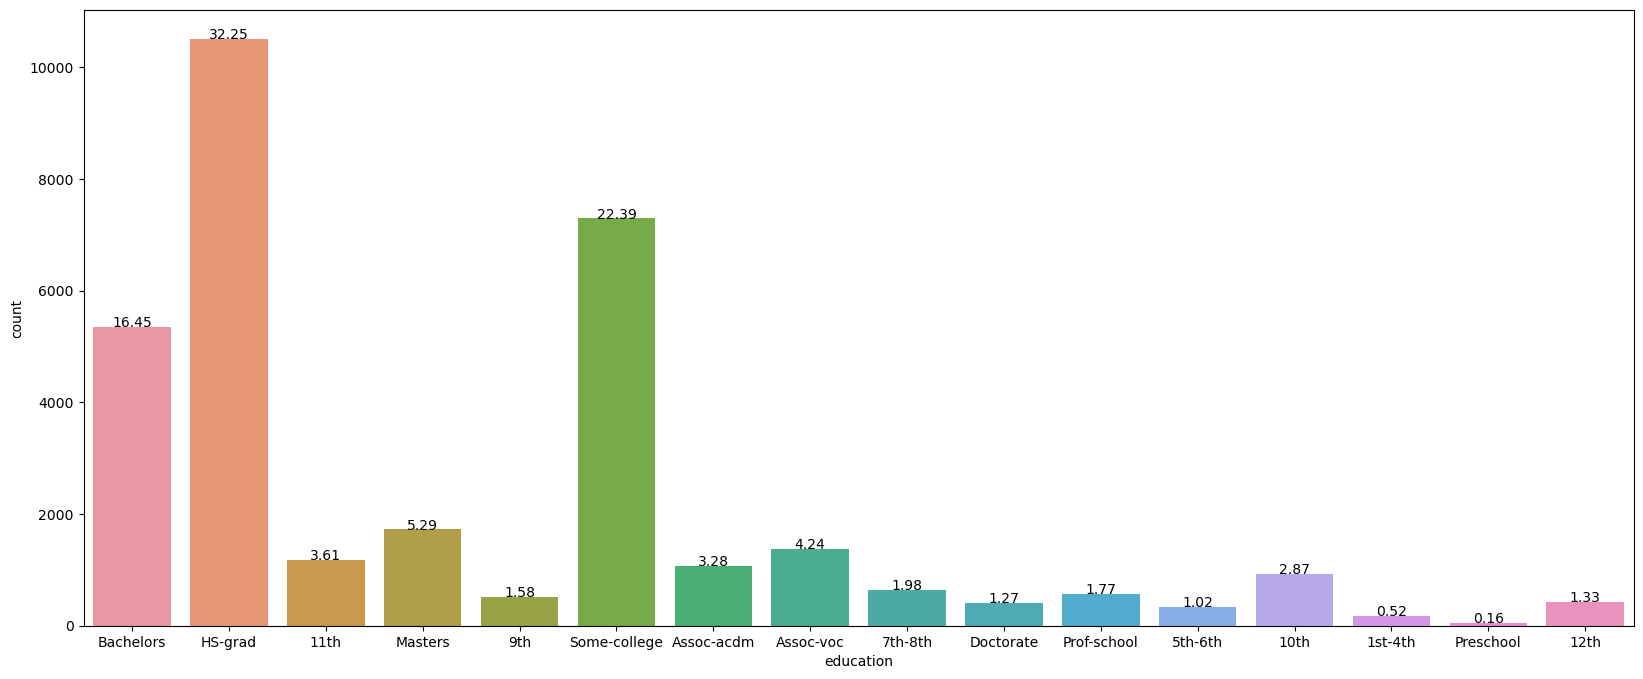

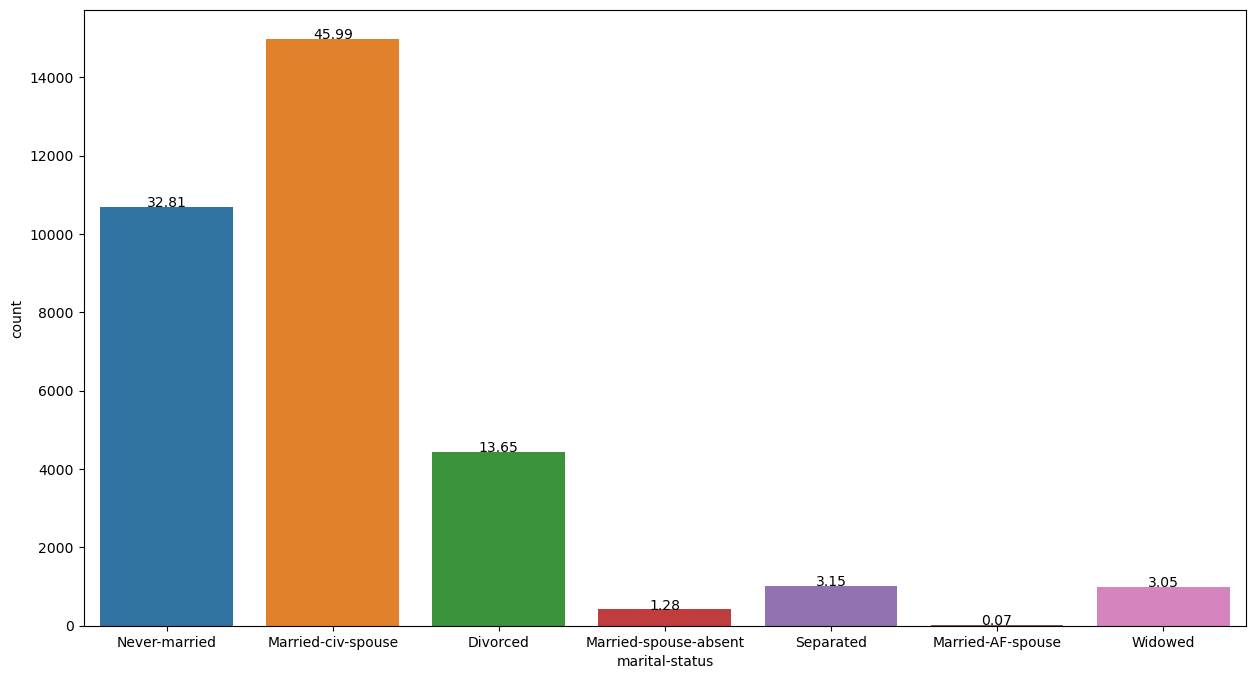

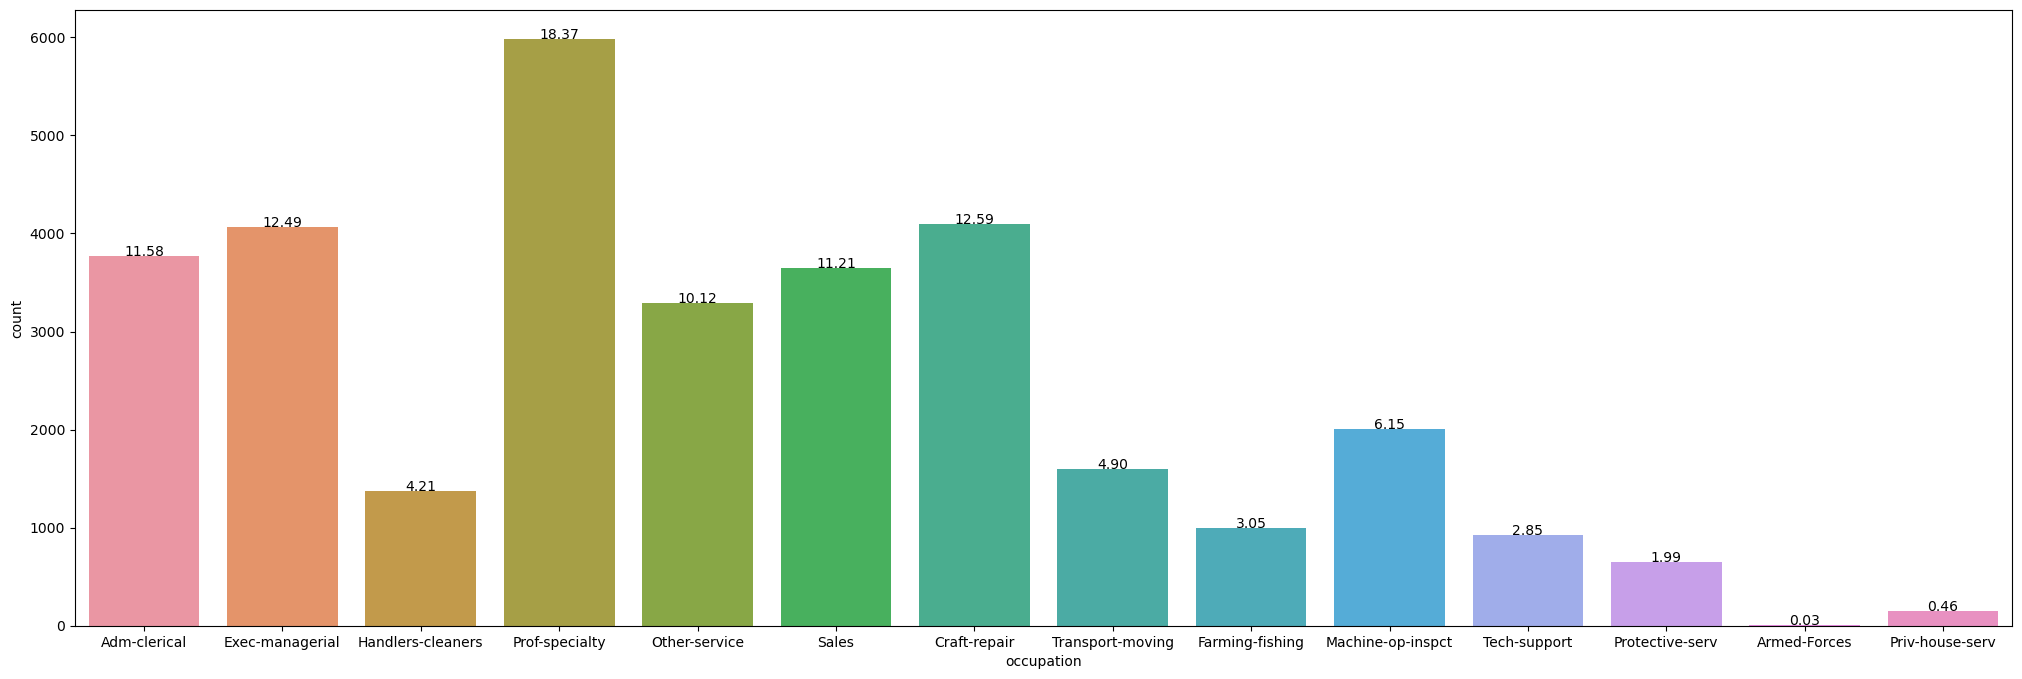

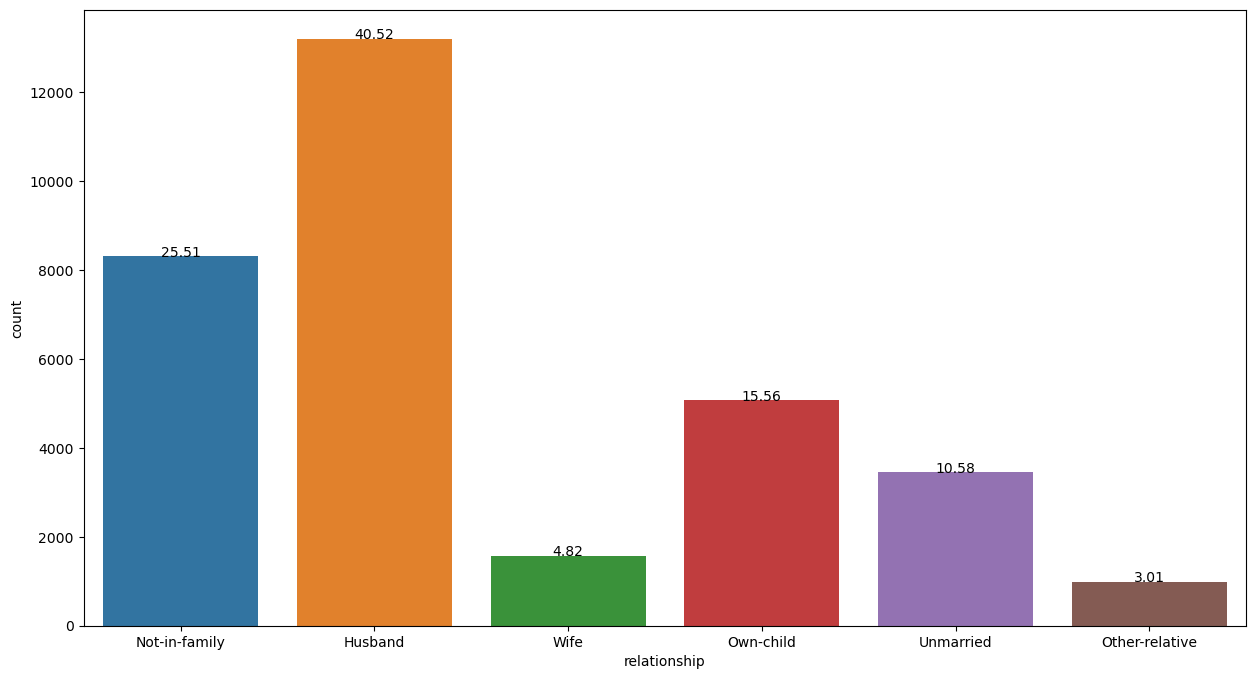

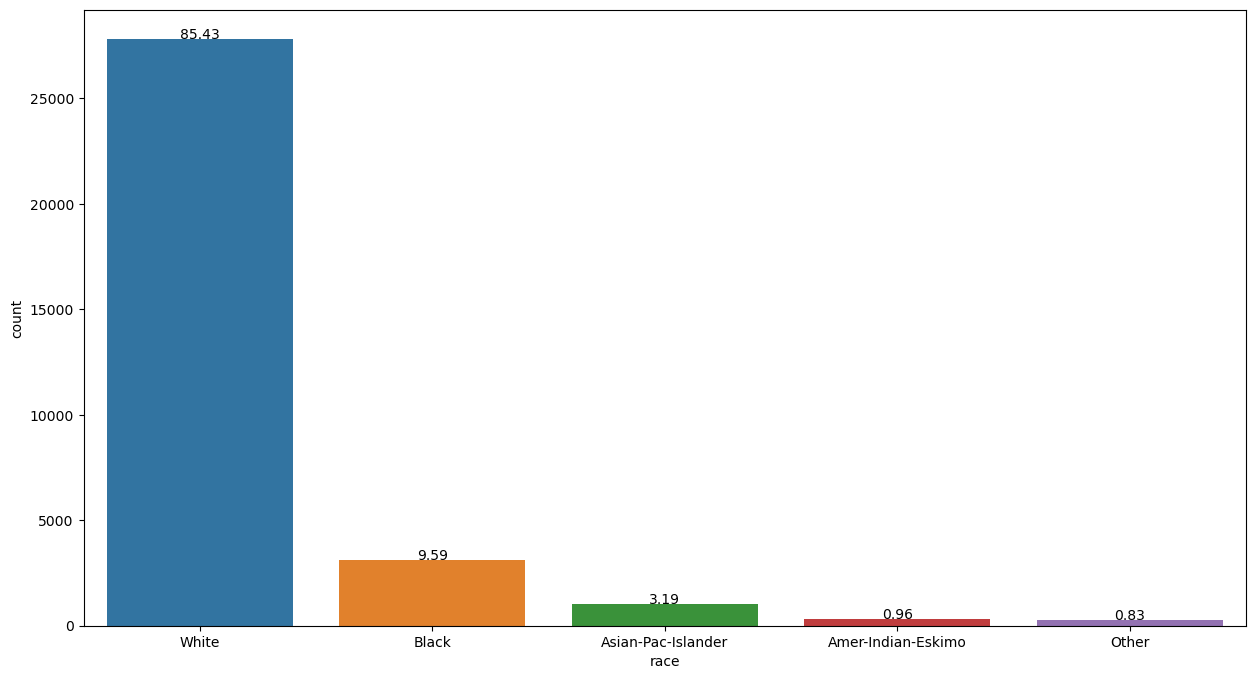

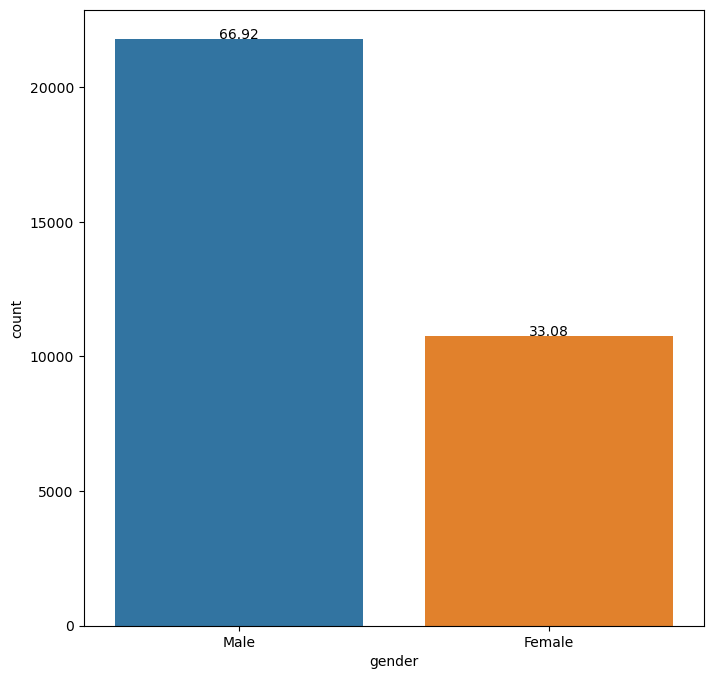

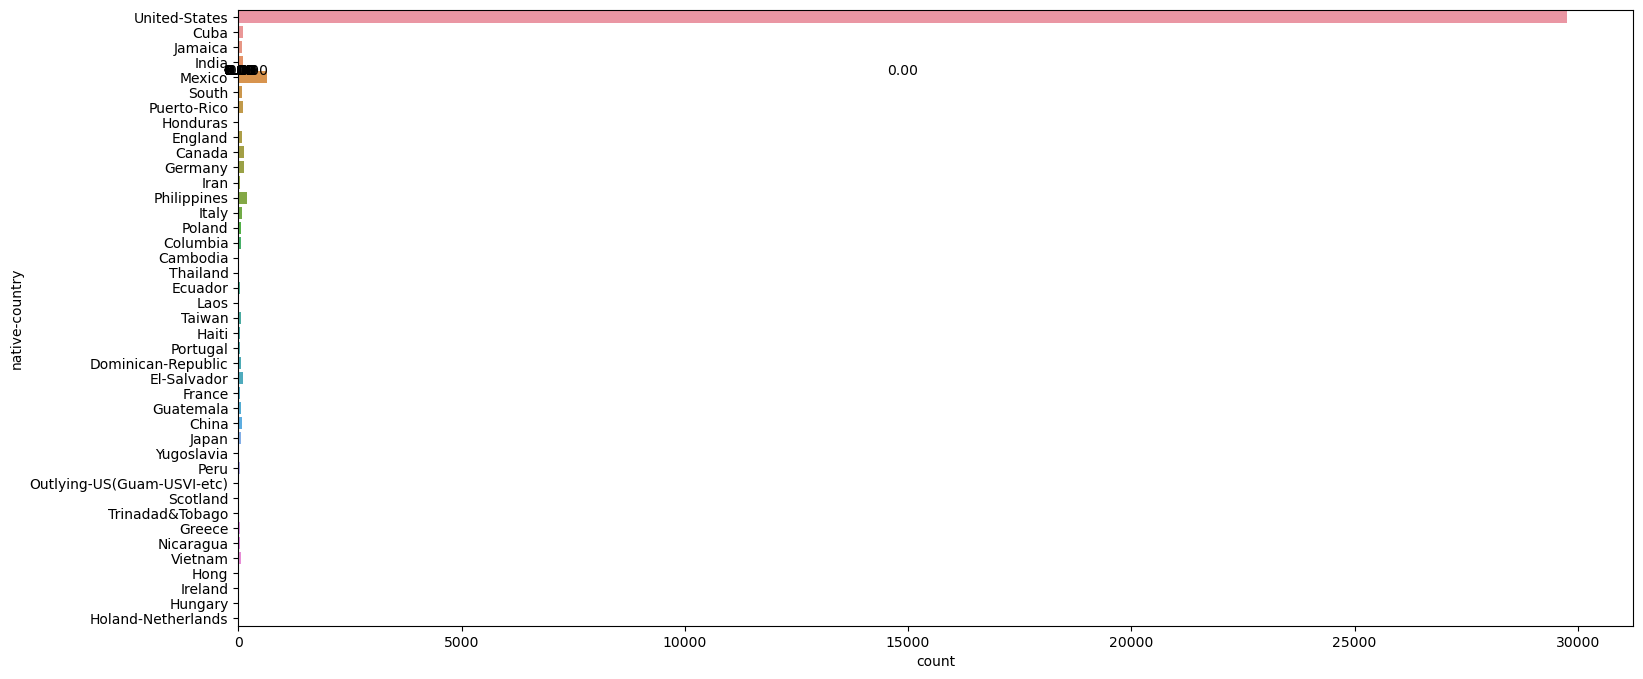

In [26]:
#workclass
plt.figure(figsize=(12,8))

total = float(len(data_train["income"]) )

ax = sns.countplot(x="workclass", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#education
plt.figure(figsize=(20,8))
total = float(len(data_train["income"]) )

ax = sns.countplot(x="education", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#marital-status
plt.figure(figsize=(15,8))
total = float(len(data_train))

ax = sns.countplot(x="marital-status", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#occupation
plt.figure(figsize=(25,8))
total = float(len(data_train) )

ax = sns.countplot(x="occupation", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#relationship
plt.figure(figsize=(15,8))
total = float(len(data_train) )

ax = sns.countplot(x="relationship", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#race
plt.figure(figsize=(15,8))
total = float(len(data_train) )

ax = sns.countplot(x="race", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#gender
plt.figure(figsize=(8,8))
total = float(len(data_train) )

ax = sns.countplot(x="gender", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#native-country
plt.figure(figsize=(18,8))
total = float(len(data_train) )

ax = sns.countplot(y="native-country", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


## 3. Visualizing the distribution of Income (0:<=50k and 1:>50k)


In [27]:
#describing the target income
dfy.describe()

,income
count,32561.000000
mean,0.240810
std,0.427581
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
dfy.value_counts("income")

income
0    24720
1     7841
dtype: int64

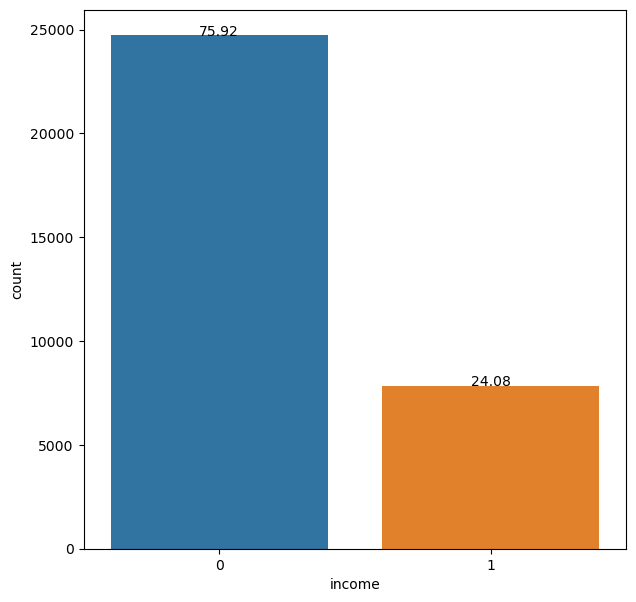

In [29]:

#plotting the histogram
plt.figure(figsize=(7,7))
total = float(len(data_train) )

ax = sns.countplot(x="income", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## 4. Bivariate analysis
### 4.1 Age
#### 4.1.1 Boxplot (Relationship with income)

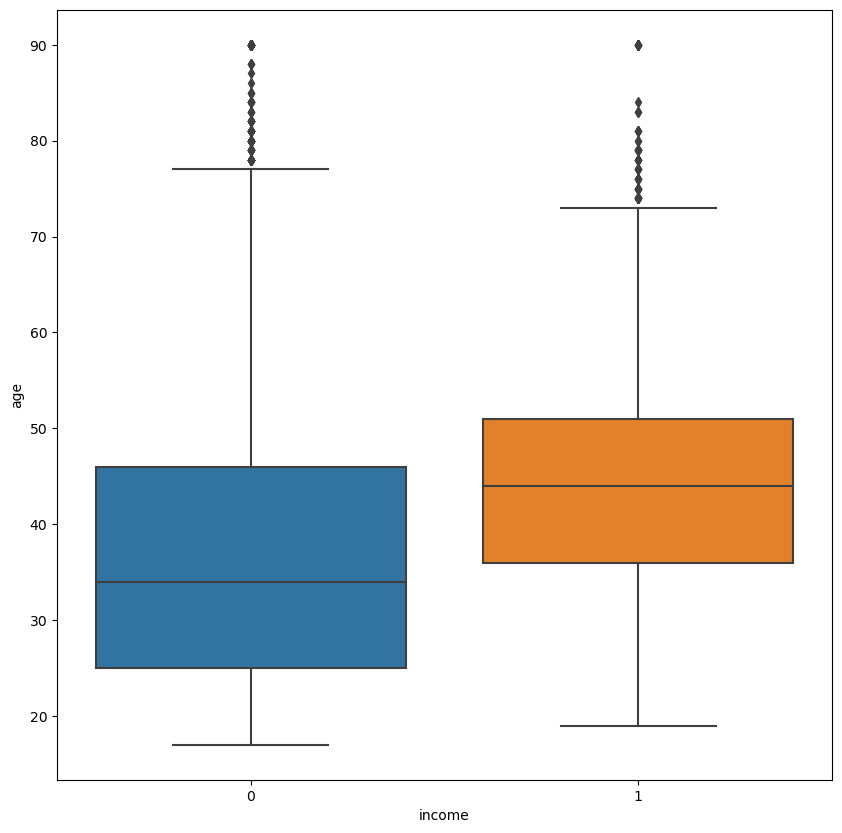

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data_train)
plt.show()


In [31]:
data_train[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.249841
0,0,36.783738


According to the data, the average age for the income group earning less than or equal to 50k is 36.8 years, while for the income group earning more than 50k, the average age is 44.2 years.

#### 4.1.2 Description about boxplot
The bivariate boxplot above shows outliers in both income groups with respect to the "age" attribute. The income group earning less than or equal to 50k has a lower median age of 34 years, while the income group earning more than 50k has a median age of 42 years. The interquartile range (IQR) for the income group earning less than or equal to 50k is between 25 and 46, indicating that the middle 50% of the age range is spread over a longer range. On the other hand, the IQR for the income group earning more than 50k is between 38 and 52, indicating a shorter range.

#### 4.1.3 Hypothesis test (to test the relationship between income & Age )
To test the relationship between income and age, a two-sample t-test can be used. The null hypothesis states that there is no statistically significant difference in the mean age of the two income groups, while the alternative hypothesis states that there is a difference. Therefore, the null hypothesis is that the mean age of the income group earning more than 50k is the same as the mean age of the income group earning less than or equal to 50k, while the alternative hypothesis is that the mean age of the two groups is different.

In [33]:
import random
from scipy import stats
import numpy as np

data = data_train[(np.abs(stats.zscore(data_train["age"])) < 3)] 

income_1 = data[data_train['income']==1]['age']
income_0 = data[data_train['income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.3737339240249975
p value 0.0009109264771096894
we reject null hypothesis


c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### 4.2.1.4 conclusion
Through statistical analysis, we can conclude that there is a statistically significant difference in the mean ages between the income group earning more than 50k and the income group earning less than or equal to 50k. This indicates that age may contribute to distinguishing between the two income groups.

### 4.2 Hours per week
#### 4.2.1  Boxplot (Relationship with income)


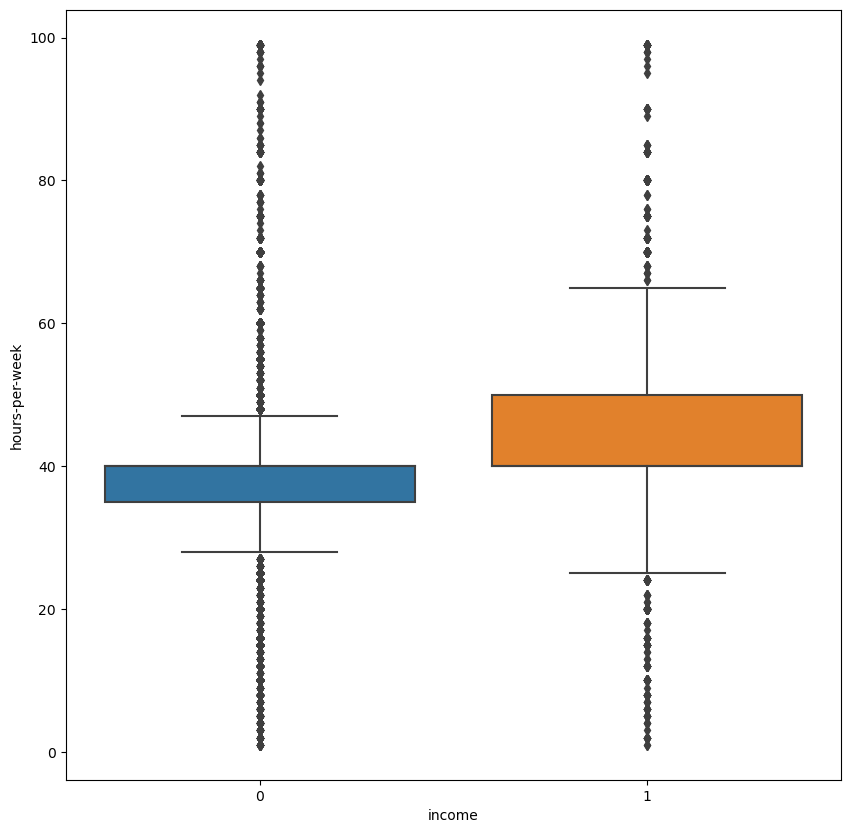

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data_train)
plt.show()

#### 4.2.2 Description about boxplot
The bivariate analysis using boxplot reveals that the median "hours-per-week" for the income group earning more than 50k is higher than that of the income group earning less than or equal to 50k.

Further interpretation shows that the income group earning more than 50k works an average of around 44 hours per week, indicating long hours. On the other hand, the income group earning less than or equal to 50k works an average of around 37 hours per week. Additionally, the boxplot for the income group earning less than or equal to 50k has a smaller range for minimum (q1-1.5 IQR) and maximum (q3+1.5 IQR) at approximately [28, 48]. However, the boxplot for the income group earning more than 50k has a larger range at approximately [23, 68].

These observations suggest that the income group earning more than 50k has more flexible working hours compared to the income group earning less than or equal to 50k. Furthermore, there are more outliers present in the income group earning less than or equal to 50k.

#### 4.2.3 Hypothesis test (to test the relationship between income & hours-per-week )
To test the relationship between income and hours-per-week, a hypothesis test can be used. The null hypothesis states that there is no statistically significant difference in the mean hours-per-week between the two income groups, while the alternative hypothesis states that there is a difference. Therefore, the null hypothesis is that the mean hours-per-week for the income group earning more than 50k is the same as that of the income group earning less than or equal to 50k, while the alternative hypothesis is that the mean hours-per-week of the two groups differ.

In [35]:
data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['income']==1]["hours-per-week"]
income_0 = data[data['income']==0]["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.1345857236993035
p value 0.0000533784486555806533467083418997845001285895705223083496093750000000
we reject null hypothesis


#### 4.2.4 conclusion
By performing a statistical analysis using a two-sample t-test, we can conclude that there is a difference in the mean income of the group earning more than 50k and the group earning less than or equal to 50k. This suggests that the number of hours worked per week has some contribution to distinguishing between the two income groups.

### 4.3 fnlwgt
#### 4.3.1 Boxplot (Relationship with income)

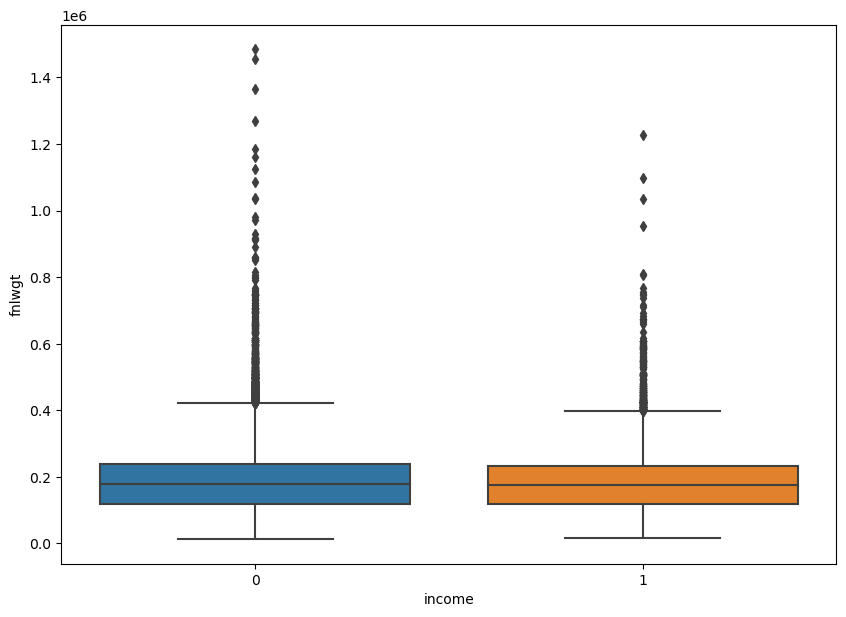

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

#### 4.3.2 Description about boxplot

The boxplot above shows that both income groups have nearly the same interquartile range (IQR), and the median is centered on 0. Outliers are present in both income groups. The boxplot for final weight with respect to income groups is similar, except that there are more outliers in the income group earning less than or equal to 50k.

#### 4.3.3 Hypothesis test (to test the relationship between income & fnlwgt)
To test the relationship between income and final weight, a hypothesis test can be performed. The null hypothesis states that there is no difference in the mean final weight of the two income groups, while the alternative hypothesis states that there is a difference. Therefore, the null hypothesis is that the mean final weight of the income group earning more than 50k is the same as the mean final weight of the income group earning less than or equal to 50k, while the alternative hypothesis is that the mean final weight of the two groups is different.

In [37]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 

income_1 = data[data['income']==1]["fnlwgt"]
income_0 = data[data['income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 0.009401555440342168
p-value 0.9925082223550781
we accept null hypothesis


#### 4.3.4 Conclusion
By conducting a statistical analysis using a two-sample t-test, we can conclude that there is no significant difference in the means of the income group earning more than 50k and the income group earning less than or equal to 50k. Therefore, it can be inferred that the final weight variable does not contribute to distinguishing between the two income groups.

### 4.4 capital-gain
#### 4.4.1 Boxplot (Relationship with income)

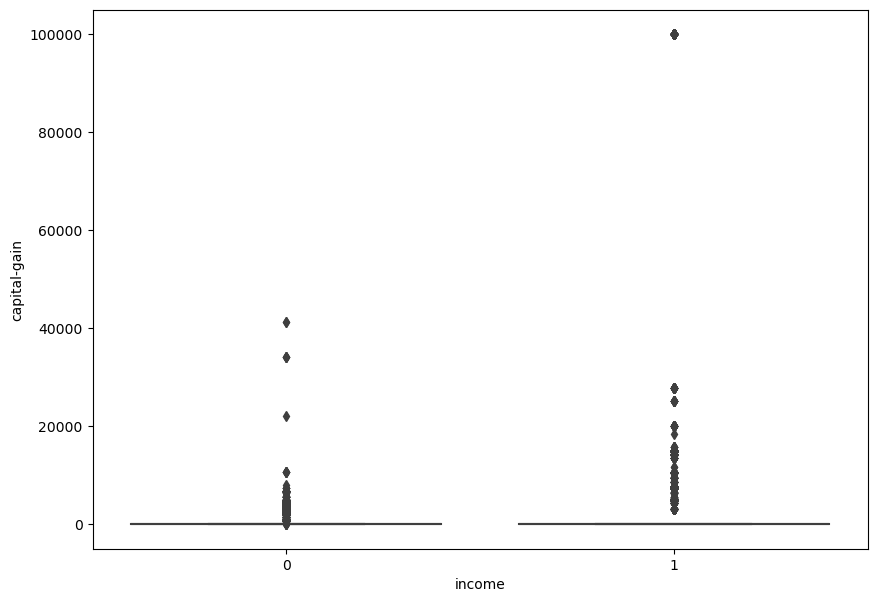

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

#### 4.4.2 Description about boxplot
The boxplot indicates that for both income groups, the majority of capital gains values are concentrated at zero.
#### 4.4.3 Hypothesis test (to test the relationship between income & capital gain )
The null hypothesis is that there is no significant difference in the means of capital gains for the income group earning more than 50k and the income group earning less than or equal to 50k. The alternative hypothesis is that there is a significant difference in the means of capital gains for the two income groups.

In [39]:
data = data[(np.abs(stats.zscore(data["capital-gain"])) < 3)] 

income_1 = data[data['income']==1]["capital-gain"]
income_0 = data[data['income']==0]["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.945244985597354
p-value 0.0001424324029069482
we reject null hypothesis


#### 4.4.4 Conclusion
By performing a statistical analysis using the two-sample t-test, we can conclude that there is a significant difference in the mean between the income group earning more than 50k and the income group earning less than or equal to 50k.

### 4.5 capital-loss
#### 4.5.1 Boxplot (Relationship with income)

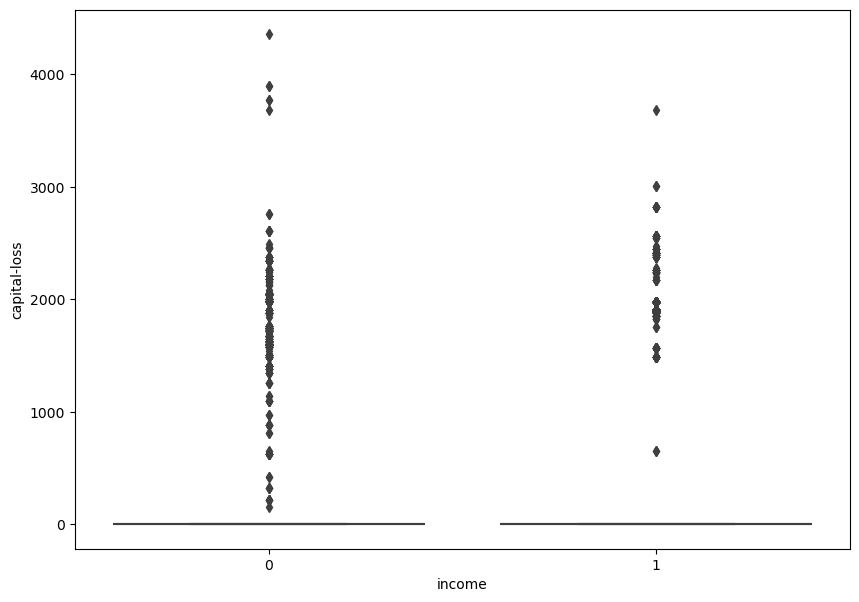

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

#### 4.5.2 Description about boxplot
The boxplot for capital loss is similar to the boxplot for capital gain, with the majority of values concentrated around 0.

#### 4.5.3 Hypothesis test (to test the relationship between income & capital loss)
Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [41]:
income_1 = data[data['income']==1]["capital-loss"]
income_0 = data[data['income']==0]["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 1.4173391901037313
p-value 0.1582603738544767
we accept null hypothesis


#### 4.5.4 conclusion
By conducting a statistical analysis using a two-sample t-test, we have found that there is no significant difference in the mean capital loss between the income group earning more than 50k and the income group earning less than or equal to 50k. This means that capital loss is not a reliable predictor for differentiating between the two income groups.

### 4.6 Workclass
#### 4.6.1 Plot (Relationship with income)

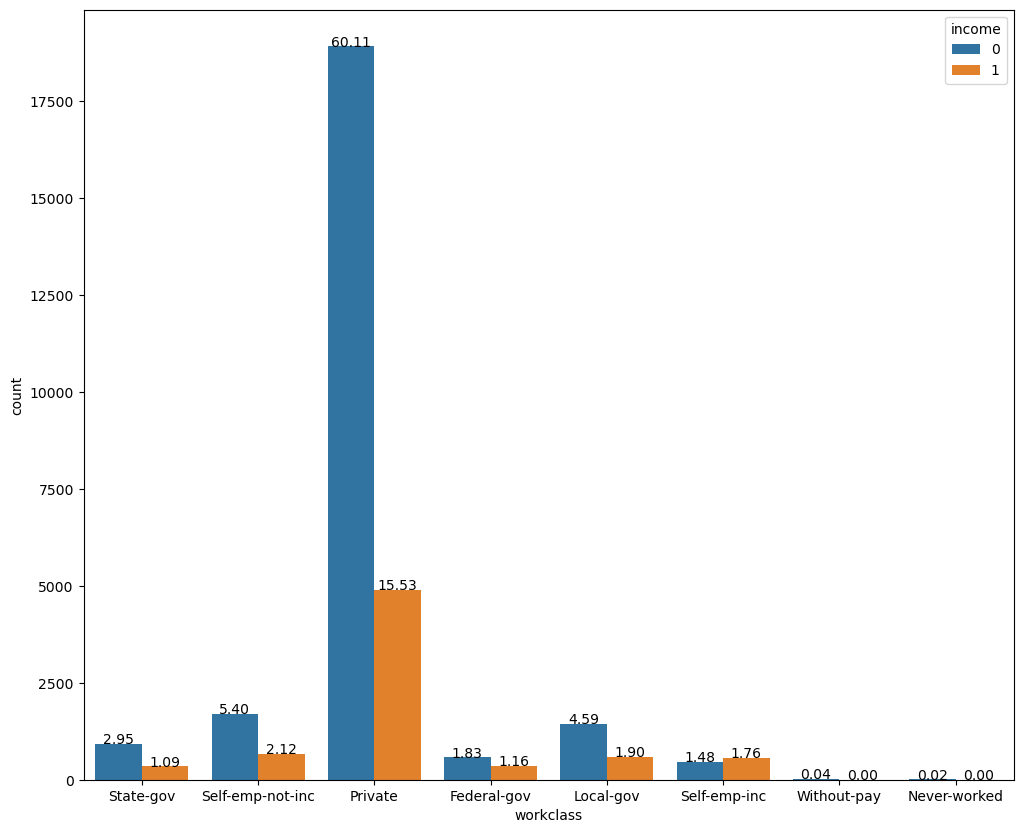

In [42]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.6.2 Description about plot
The plot above displays the distribution of income groups across different workclasses.

In the private workclass, the majority of individuals (60.11%) earn less than or equal to 50k and belong to income group 0. The self-emp-inc workclass is the only category where more people earn more than 50k and belong to income group 1. In the Federal-gov workclass, more than half of the individuals earn more than 50k.
#### 4.6.4 Hypothesis test (to test the relationship between income & workclass)
To test the relationship between income and workclass, we can use a chi-square goodness of fit test. This statistical test allows us to determine whether the observed proportions of a categorical variable differ significantly from the hypothesized proportions. For example, if we hypothesize that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc, and 10% self-emp-inc, we can use a chi-square goodness of fit test to determine whether the observed proportions from our sample significantly differ from these hypothesized proportions.

In [43]:
# contingency table
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
workclass,,
Federal-gov,5,1
Local-gov,5,3
Never-worked,1,0
Private,29,12
Self-emp-inc,0,1
Self-emp-not-inc,4,0
State-gov,2,0


The table introduced by Karl Pearson is known as a contingency table, as its purpose is to determine whether one variable is dependent on another. For instance, does a person's interest in work class depend on their income, or are these two variables independent of each other? However, it can be challenging to determine the relationship between variables based on the contingency table alone. To help with this, we use a statistical method called Pearson's chi-squared test.

The chi-squared test compares the observed frequency in the contingency table with the expected frequency under the null hypothesis of independence between the two variables. The test statistic can be interpreted using the chi-squared distribution with the appropriate degrees of freedom. If the calculated test statistic is greater than the critical value, then we reject the null hypothesis, indicating that the variables are dependent. However, if the calculated test statistic is less than the critical value, we fail to reject the null hypothesis, suggesting that the variables are independent.

For instance, in this example, the null hypothesis states that there is no relationship between work class and income, while the alternative hypothesis suggests that a relationship exists between these two variables. By performing a Pearson's chi-squared test, we can determine whether the observed data supports the null hypothesis or not.

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=6
p_value 0.40391975244486644
[[ 4.38095238  1.61904762]
 [ 5.84126984  2.15873016]
 [ 0.73015873  0.26984127]
 [29.93650794 11.06349206]
 [ 0.73015873  0.26984127]
 [ 2.92063492  1.07936508]
 [ 1.46031746  0.53968254]]
probability=0.950, critical=12.592, stat=6.175
Independent (fail to reject H0)


#### 4.6.5 Final conclusion
Using the Chi-Squared test, we have accepted the null hypothesis that there is no relationship between the two categorical variables being analyzed. Therefore, we can conclude that there is no dependency of the "workclass" attribute on the target variable "income".

### 4.7 Education
#### 4.7.1 Plot (Relationship with income)

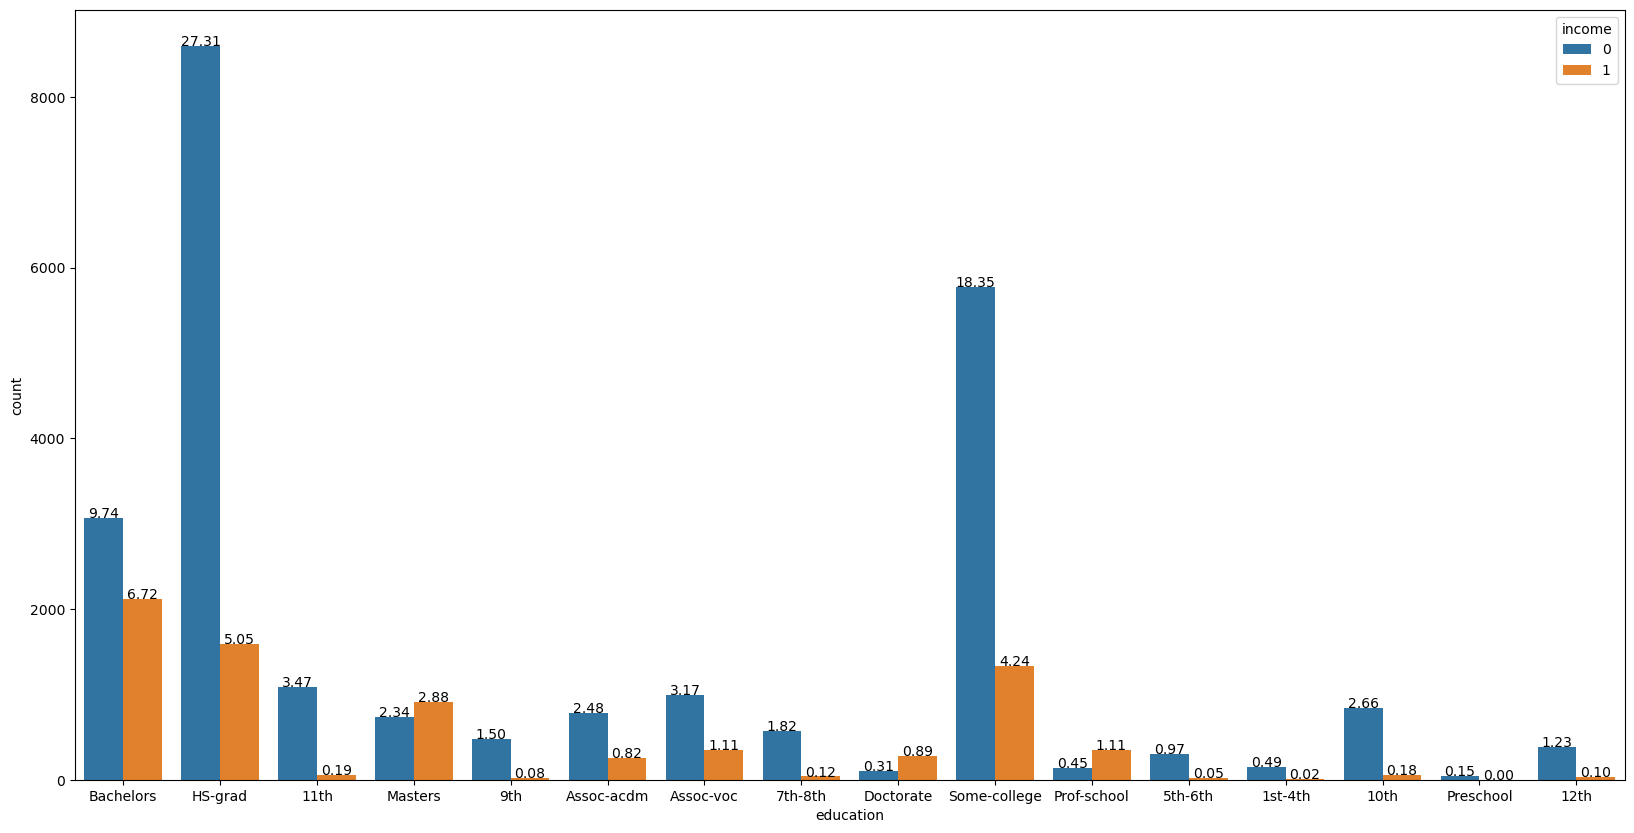

In [45]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.7.2 Description about plot
The plot reveals that despite the majority of categories falling under the HS-grad, only 5.05% of people belong to the income group earning more than 50k. Surprisingly, this percentage is lower than the categories falling under the Bachelors, which is 6.72%. Only a few categories in the "education" attribute have a higher percentage of individuals falling under income group 1 than income group 0. These categories are prof-school, masters, and doctorate. This suggests that higher education may lead to better earnings.
#### 4.7.3 Hypothesis test (to test the relationship between income & education)
To test the relationship between income and education, the following hypotheses are proposed. The null hypothesis (H0) states that there is no relationship between education and income, while the alternative hypothesis (H1) states that there is a relationship between education and income.

In [46]:
# contingency table
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,1,0
11th,2,0
12th,0,1
5th-6th,1,0
9th,1,0
Assoc-acdm,2,2
Assoc-voc,0,1
Bachelors,7,5
Doctorate,0,1


In [47]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
p-value 0.194079981449046
[[ 0.73015873  0.26984127]
 [ 1.46031746  0.53968254]
 [ 0.73015873  0.26984127]
 [ 0.73015873  0.26984127]
 [ 0.73015873  0.26984127]
 [ 2.92063492  1.07936508]
 [ 0.73015873  0.26984127]
 [ 8.76190476  3.23809524]
 [ 0.73015873  0.26984127]
 [12.41269841  4.58730159]
 [ 2.19047619  0.80952381]
 [13.87301587  5.12698413]]
probability=0.950, critical=19.675, stat=14.753
Independent (fail to reject H0)


#### 4.7.4 Final conclusion
We can conclude that the level of education may have an impact on the income level of individuals.

### 4.8 Marital-status
#### 4.8.1 Plot (Relationship with income)

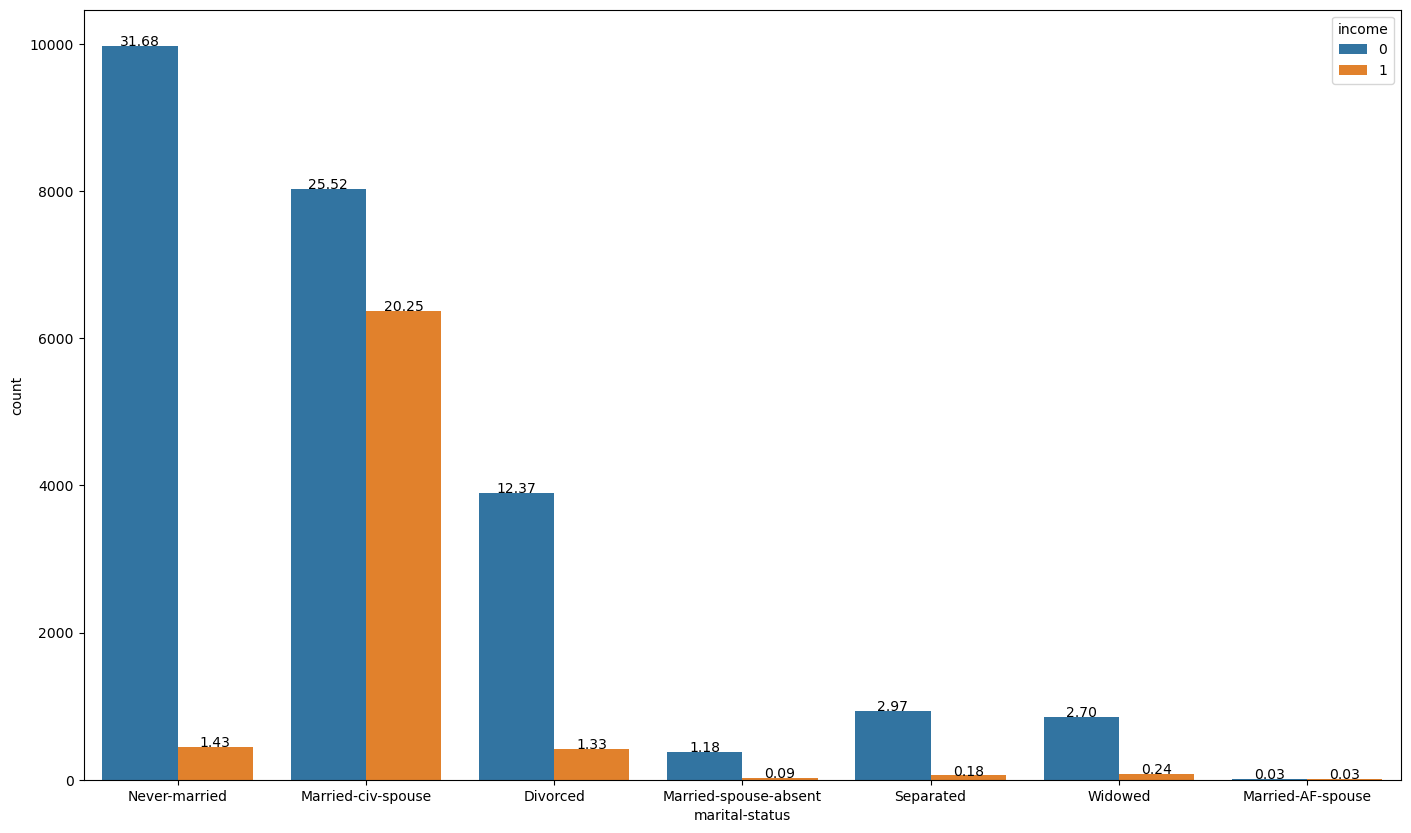

In [48]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.8.2 Description about plot
The countplot provides the following insights:

Among all marital-status categories, Married-civ-spouse has the highest percentage (20.25%) of individuals earning over 50k.
Despite having 16117 observations in the "marital-status" attribute (which is the second-highest), only 1.43% of the "Never-married" population earns over 50k.
Married-spouse-absent and Married-AF-spouse categories have a negligible contribution to the population earning over 50k.
#### 4.8.3 Hypothesis test (to test the relationship between income & marital-status)
To test the relationship between income and marital-status, the following hypotheses can be formulated:

Null Hypothesis (H0): There is no relationship between marital-status and income.
Alternative Hypothesis (H1): There is a relationship between marital-status and income.

In [49]:
# contingency table
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
marital-status,,
Divorced,7,0
Married-civ-spouse,15,14
Married-spouse-absent,0,1
Never-married,18,1
Separated,5,1
Widowed,1,0


In [50]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.004120186549712194
[[ 5.11111111  1.88888889]
 [21.17460317  7.82539683]
 [ 0.73015873  0.26984127]
 [13.87301587  5.12698413]
 [ 4.38095238  1.61904762]
 [ 0.73015873  0.26984127]]
probability=0.950, critical=11.070, stat=17.209
Dependent (reject H0)


#### 4.8.4 Conclusion
By conducting a Chi-Squared test, we were able to determine the relationship between two categorical variables: "marital-status" and "income". Based on the results, we rejected the null hypothesis (H0), which stated that there is no relationship between the two variables. Therefore, we can conclude that there is some level of dependency between the "marital-status" attribute and the target variable "income".

### 4.9 Occupation
4.9.1 Plot (Relationship with income)

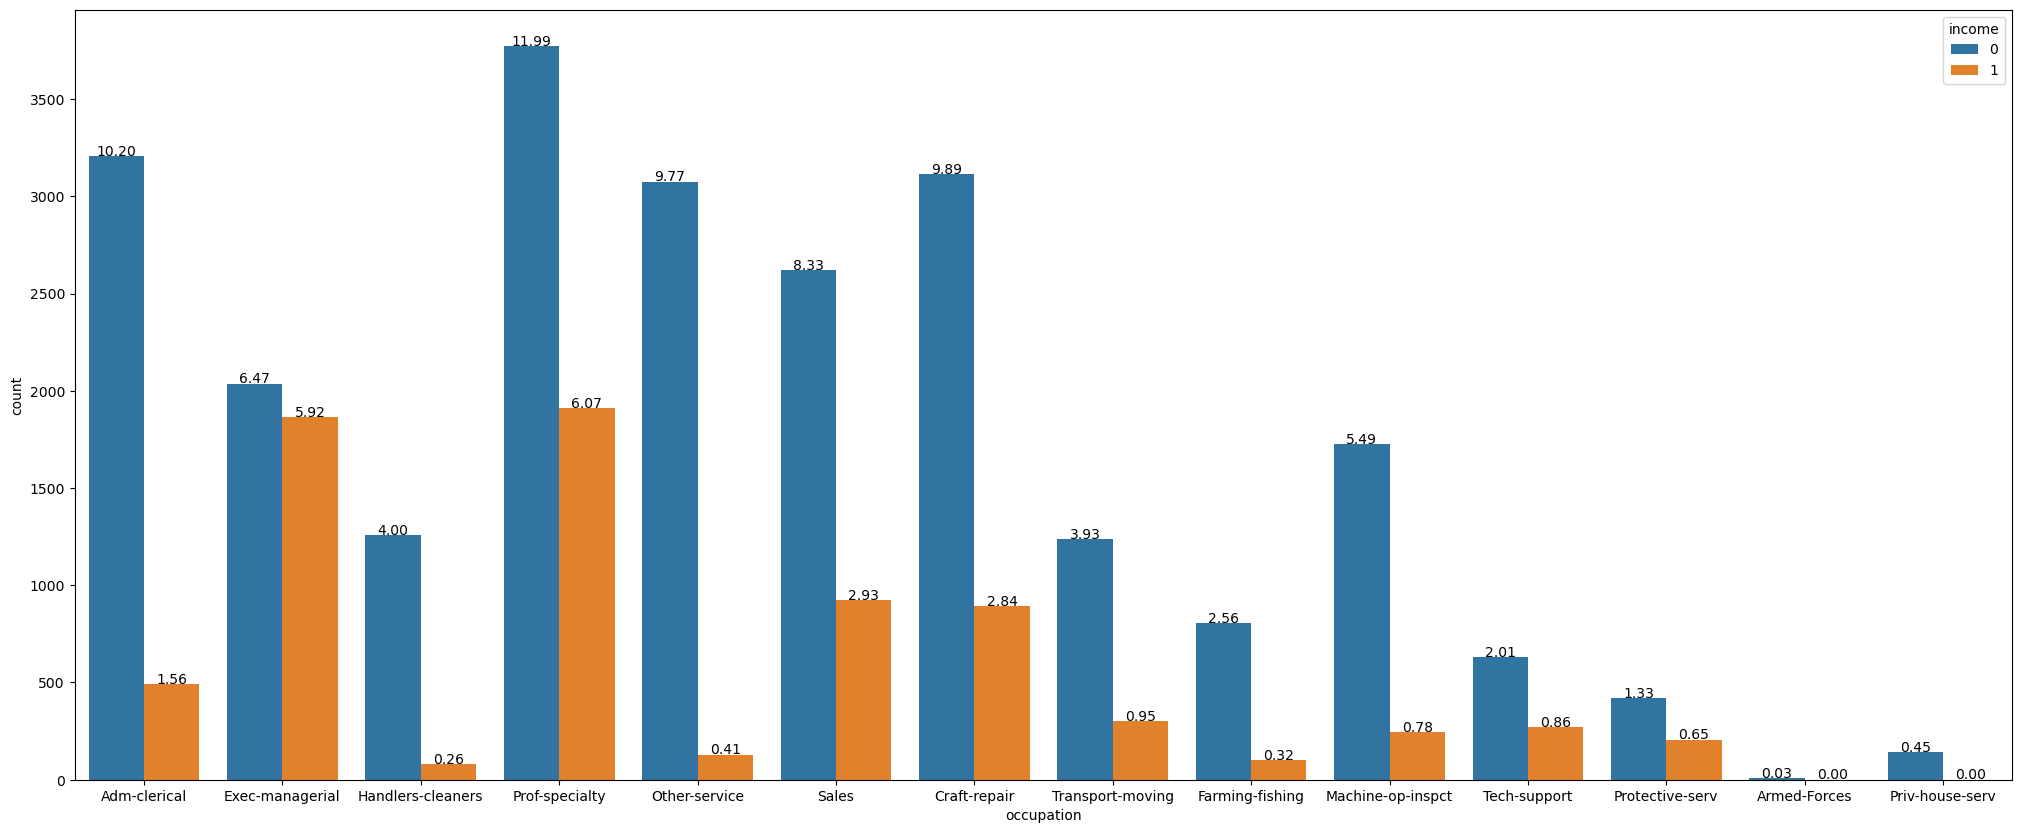

In [51]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.9.2 Description about plot
In the countplot above, we can see that the "Prof-specialty" occupation has the highest percentage of individuals falling into both income groups, with 10.20% in group 0 and 6.47% in group 1. One interesting observation from this plot is that no occupation has a higher percentage of individuals in income group 1 than in income group 0. This means that for every occupation, the number of individuals earning less than 50k is greater than the number of individuals earning more than 50k.
#### 4.9.3 Hypothesis test (to test the relationship between income & occupation)
Here, In this example

H0(Null Hypothesis) : There is no relationship between occupation and income.
H1(Alternate Hypothesis) : There is a relationship between occupation and income.

In [52]:
# contingency table
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
occupation,,
Adm-clerical,9,1
Craft-repair,4,4
Exec-managerial,4,0
Farming-fishing,1,0
Handlers-cleaners,2,1
Machine-op-inspct,1,1
Other-service,1,0
Prof-specialty,11,4
Protective-serv,2,1


In [53]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[ 7.3015873   2.6984127 ]
 [ 5.84126984  2.15873016]
 [ 2.92063492  1.07936508]
 [ 0.73015873  0.26984127]
 [ 2.19047619  0.80952381]
 [ 1.46031746  0.53968254]
 [ 0.73015873  0.26984127]
 [10.95238095  4.04761905]
 [ 2.19047619  0.80952381]
 [ 7.3015873   2.6984127 ]
 [ 2.92063492  1.07936508]
 [ 1.46031746  0.53968254]]
probability=0.950, critical=19.675, stat=8.354
Independent (fail to reject H0)


#### 4.9.4 Final conclusion
With the help of Chi-Squared test, we can conclude that is some dependency of "occupation" attribute on the target variable "income"

### 4.10 Relationship
#### 4.10.1 Plot (Relationship with income)

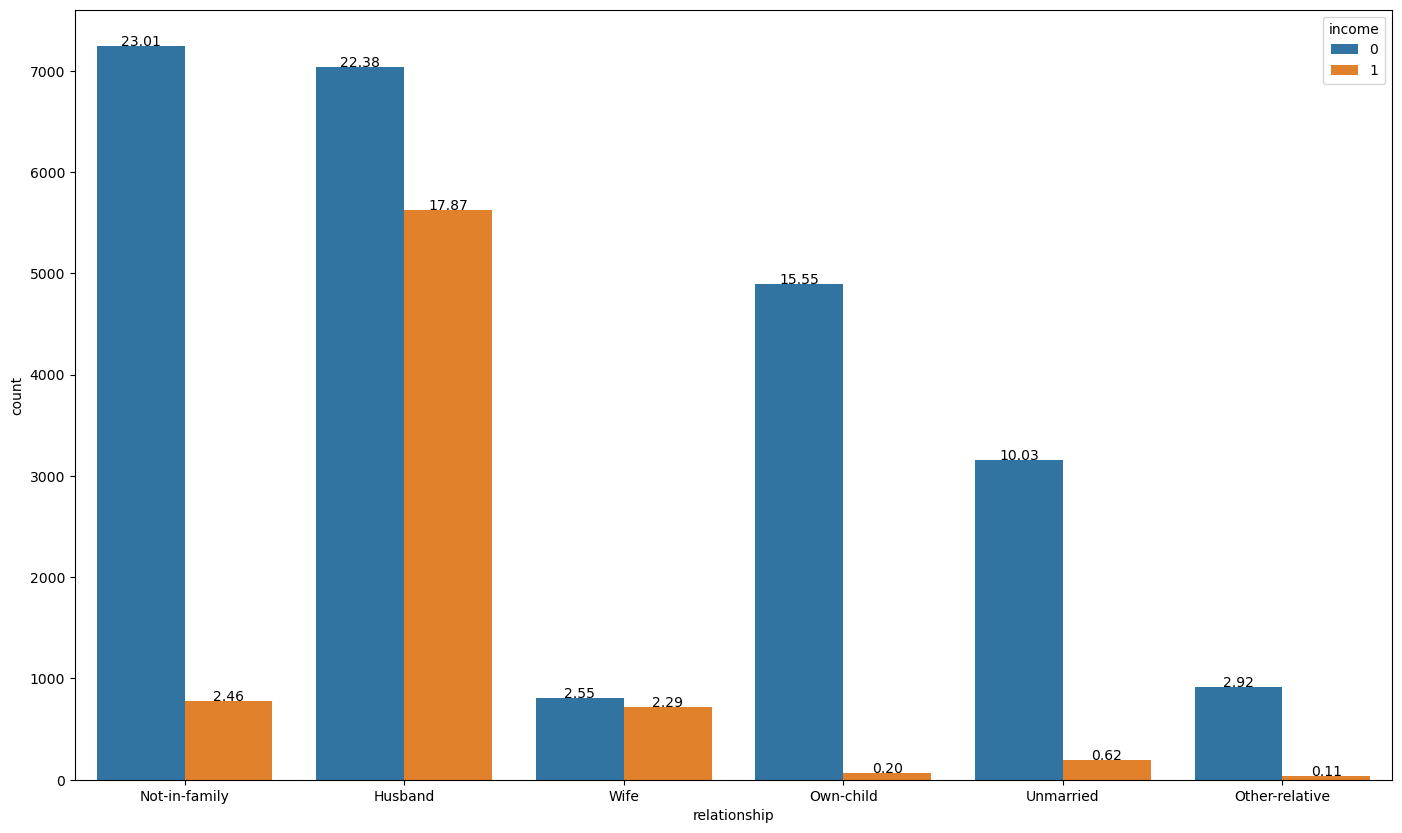

In [54]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.10.2 Description about plot
This countplot provides insights into the relationship between income and relationship categories. It shows that husbands have the highest percentage (17.87%) of earning more than 50k compared to all other categories. One notable finding is that the "not-in-family" category has the highest percentage (23.01%) of earning less than 50k, but it has a similar percentage (2.55%) to the "wife" category (2.29%) in earning more than 50k. This comparison is made because the "wife" category has only a small percentage falling under the income group of 0. The "own-child" and "other-relative" categories have the lowest percentage of falling under the income group of 1. There is a significant difference between the percentage of individuals in each group falling under either income category, except for "husband" and "wife".
#### 4.10.3 Hypothesis test (to test the relationship between income & relationship)
Here, In this example

H0(Null Hypothesis) : Both the relationship and income variables are independent to each other.
H1(Alternate Hypothesis) : There is a dependent to each other.

In [55]:
# contingency table
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
relationship,,
Husband,14,13
Not-in-family,13,3
Other-relative,1,0
Own-child,9,0
Unmarried,8,0
Wife,1,1


In [56]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[19.71428571  7.28571429]
 [11.68253968  4.31746032]
 [ 0.73015873  0.26984127]
 [ 6.57142857  2.42857143]
 [ 5.84126984  2.15873016]
 [ 1.46031746  0.53968254]]
probability=0.950, critical=11.070, stat=13.879
Dependent (reject H0)


#### 4.10.4 Final conclusion
After conducting the test, the null hypothesis was rejected, indicating that there is some dependency of the "relationship" attribute on the target variable "income". Therefore, we can conclude that the "relationship" attribute is a significant predictor of the target variable "income".

### 4.11 Race
#### 4.11.1 Plot (Relationship with income)

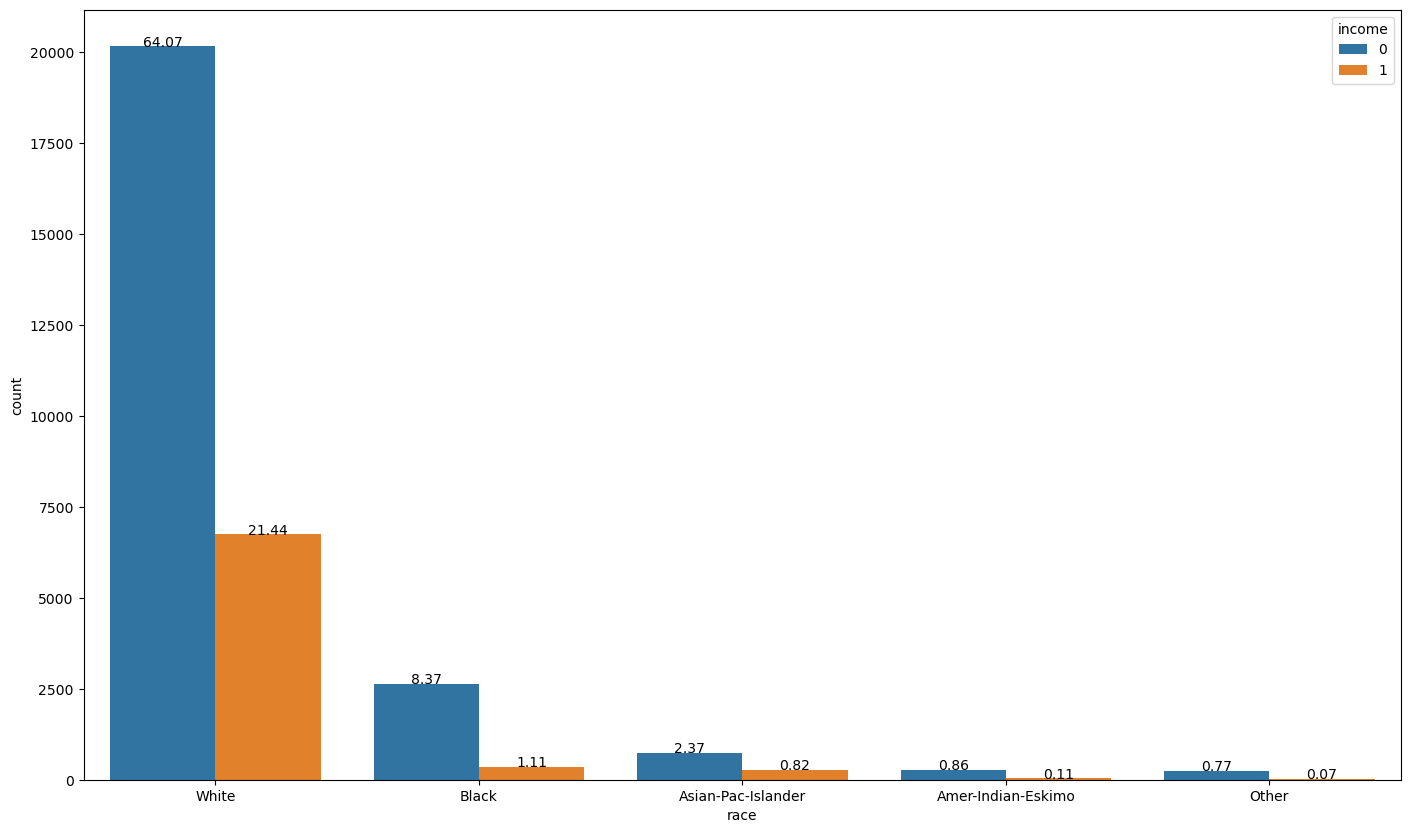

In [57]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.11.2 Description about plot
The countplot provides insights into the relationship between race and income. Based on the previous summary statistics, it is easy to observe the relationship between the "white" race and income.

The percentage of individuals falling into each income group varies significantly across different races, with the exception of the "other" (0.77%) and "amer-indian-eskimo" (0.86%) categories. However, it is important to note that the smaller number of observations for these categories may be contributing to this lack of difference.
#### 4.11.3 Hypothesis test (to test the relationship between income & race)
Here, In this example

H0(Null Hypothesis) : There is no relationship between race and income.
H1(Alternate Hypothesis) : There is a relationship between race and income.

In [58]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
race,,
Amer-Indian-Eskimo,3,0
Black,5,1
Other,1,0
White,37,16


In [59]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 0.5562402848661114
[[ 2.19047619  0.80952381]
 [ 4.38095238  1.61904762]
 [ 0.73015873  0.26984127]
 [38.6984127  14.3015873 ]]
probability=0.950, critical=7.815, stat=2.079
Independent (fail to reject H0)


#### 4.11.4 Final conclusion
With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "race" attribute on the target variable "income"

### 4.12 Gender
#### 4.12.1 Plot (Relationship with income)

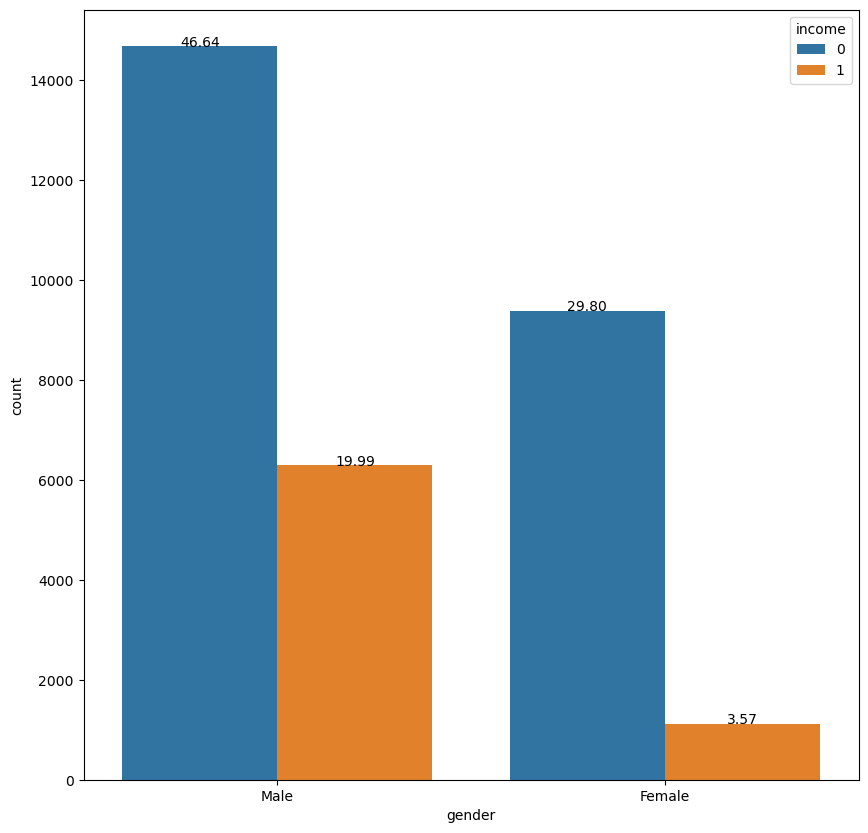

In [60]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 4.12.2 Description about plot
The countplot provides insights into the distribution of income for males and females.

It shows that only a small proportion of females (3.57%) earn more than 50k, whereas for males, a larger proportion (19.99%) earn more than 50k. This suggests that there is a significant gender disparity in income, with a much lower percentage of females earning a high income compared to males.
#### 4.12.3 Hypothesis test (to test the relationship between income & gender)
Here, In this example

H0(Null Hypothesis) : There is no relationship between gender and income.
H1(Alternate Hypothesis) : There is a relationship between gender and income.

In [61]:
# contingency table
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
gender,,
Female,19,1
Male,27,16


In [62]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.017495564562923945
[[14.6031746  5.3968254]
 [31.3968254 11.6031746]]
probability=0.950, critical=3.841, stat=5.646
Dependent (reject H0)


#### 4.12.4 Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "gender" attribute on the target variable "income"

### 4.13 Native-country
#### 4.13.1 Hypothesis test (to test the relationship between income & native-country)
Here, In this example

H0(Null Hypothesis) : There is no relationship between native-country and income.
H1(Alternate Hypothesis) : There is a relationship between native-country and income.

In [63]:
# contingency table
c_t = pd.crosstab(data['native-country'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 

In [64]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 1.0
[[ 2.92063492  1.07936508]
 [43.07936508 15.92063492]]
probability=0.950, critical=3.841, stat=0.000
Independent (fail to reject H0)


#### 4.13.2 Conclusion
With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "native-country" attribute on the target variable "income"

## 5. Data Transformation


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
for col in cat_columns:
    data_train[col] = le.fit_transform(data_train[col])

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
for col in cat_columns:
    data_test[col] = le.fit_transform(data_test[col])


# Print the first 5 rows of the transformed dataset
print(data_train.head())
#print(data_test.head())



   age  workclass  fnlwgt  education  educational_num  marital-status  \
0   39          6   77516          9               13               4   
1   50          5   83311          9               13               2   
2   38          3  215646         11                9               0   
3   53          3  234721          1                7               2   
4   28          3  338409          9               13               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           0             1     4       1          2174             0   
1           3             0     4       1             0             0   
2           5             1     4       1             0             0   
3           5             0     2       1             0             0   
4           9             5     2       0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              13              38 

## 6. Correlation betweeen the Attributes

In [ ]:
data_train.corr(method='pearson')

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
educational_num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
gender,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


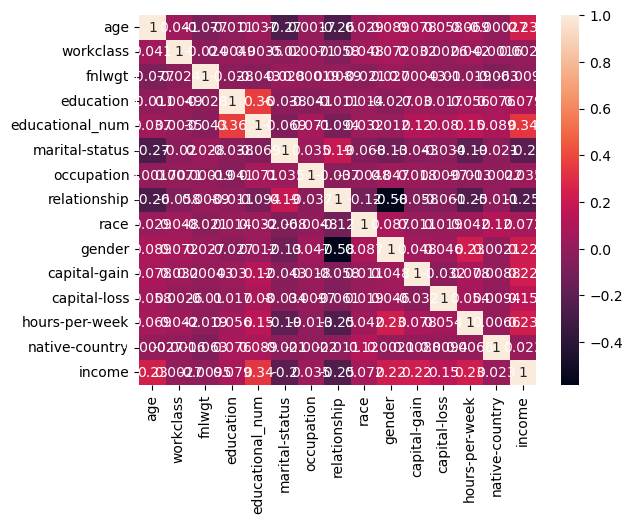

In [ ]:
sns.heatmap(data_train.corr(method='pearson'),annot=True);
plt.show()

## 7. Outlier Removal

### Using Boxplot and scatter plot to visulize those outlier data

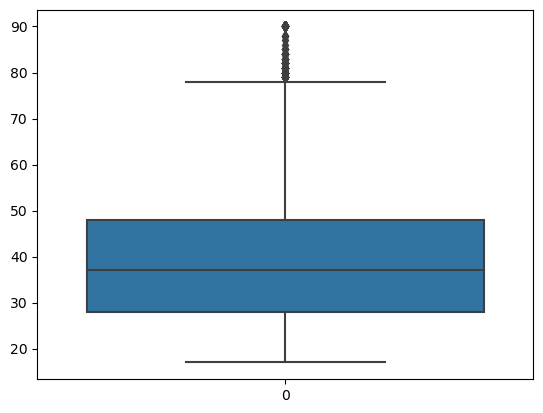

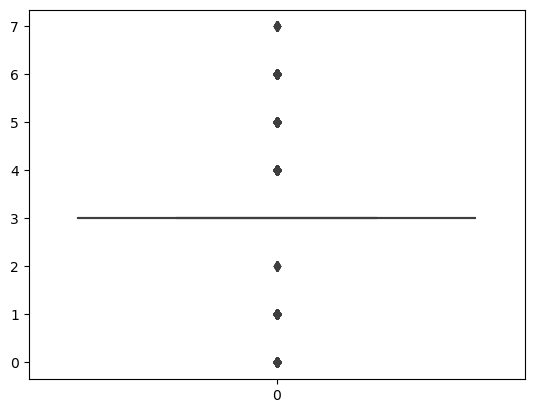

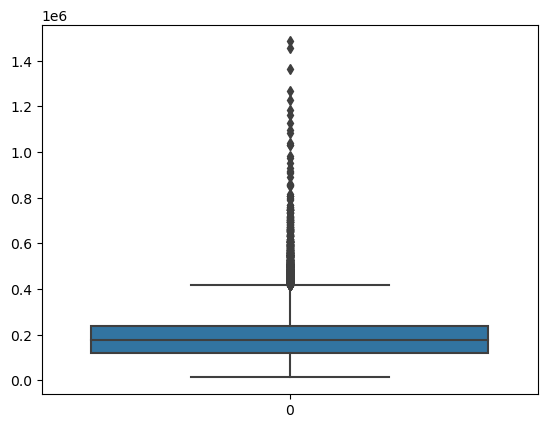

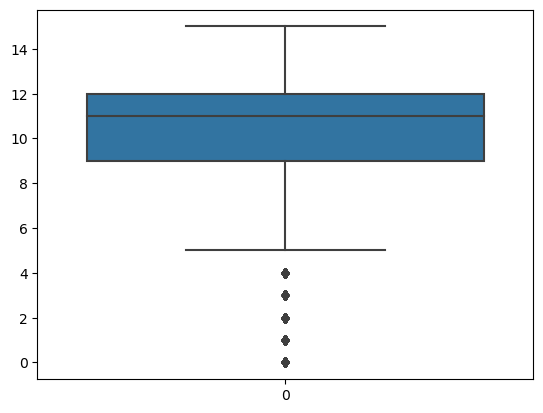

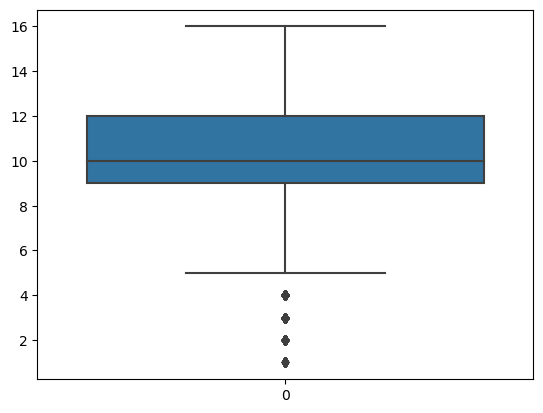

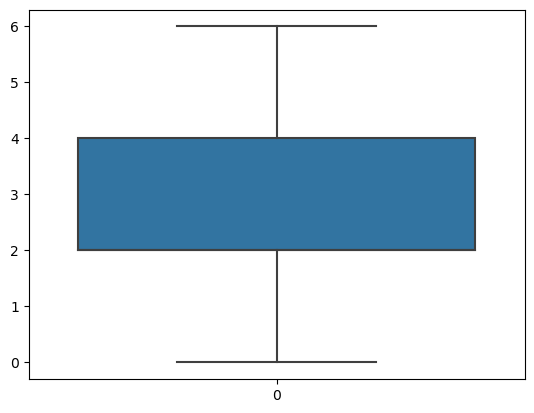

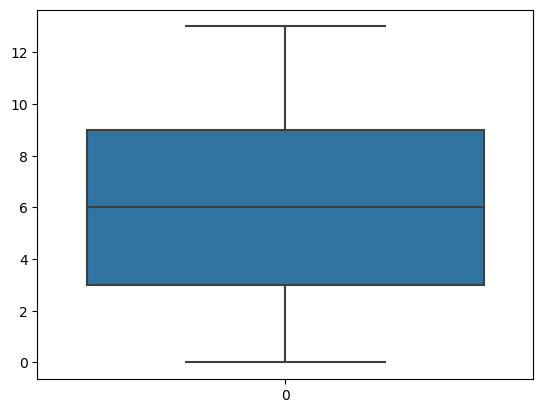

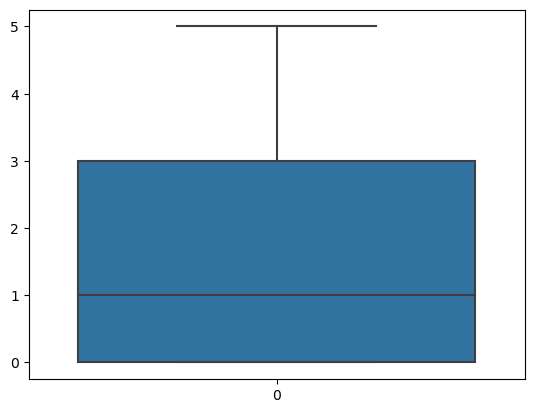

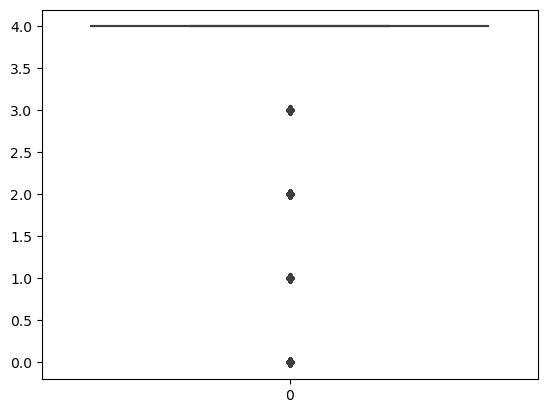

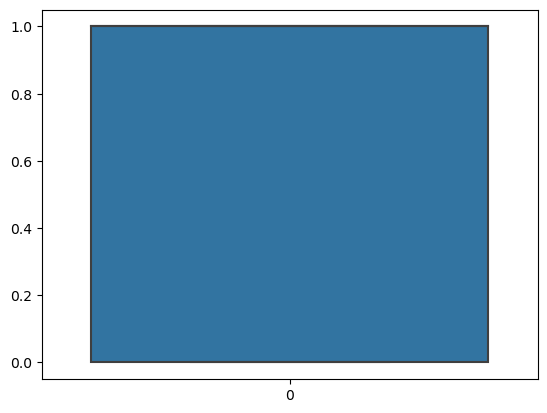

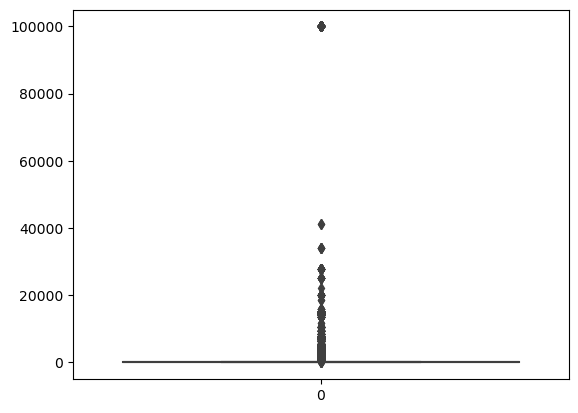

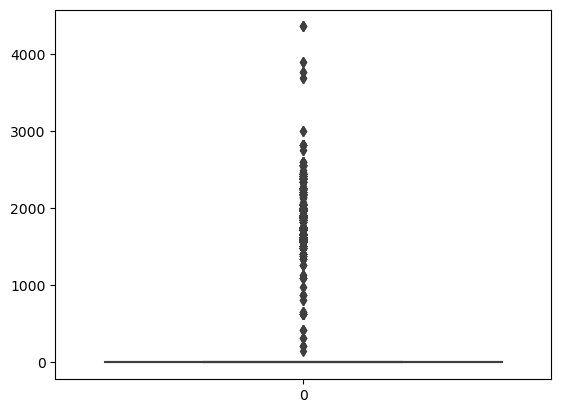

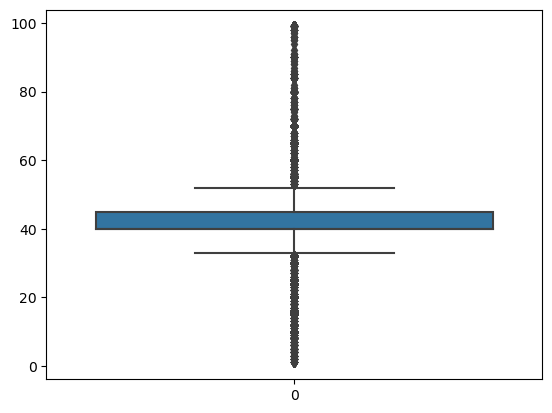

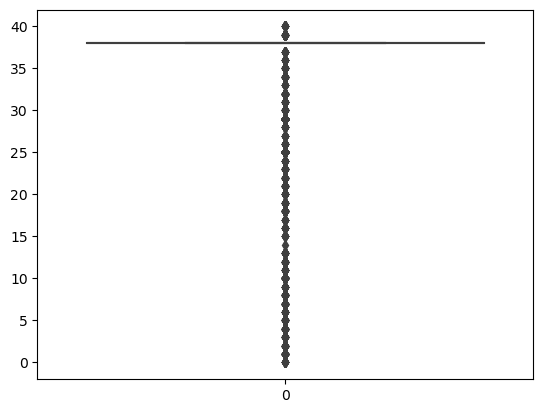

In [ ]:
import seaborn as sns
sns.boxplot(data_train['age'])
plt.show()
sns.boxplot(data_train['workclass'])
plt.show()
sns.boxplot(data_train['fnlwgt'])
plt.show()
sns.boxplot(data_train['education'])
plt.show()
sns.boxplot(data_train['educational_num'])
plt.show()
sns.boxplot(data_train['marital-status'])
plt.show()
sns.boxplot(data_train['occupation'])
plt.show()
sns.boxplot(data_train['relationship'])
plt.show()
sns.boxplot(data_train['race'])
plt.show()
sns.boxplot(data_train['gender'])
plt.show()
sns.boxplot(data_train['capital-gain'])
plt.show()
sns.boxplot(data_train['capital-loss'])
plt.show()
sns.boxplot(data_train['hours-per-week'])
plt.show()
sns.boxplot(data_train['native-country'])
plt.show()

### Using IQR to find out outliers in each feature

In [ ]:
import pandas as pd
import numpy as np
data_out = data_train

# IQR
Q1 = np.percentile(data_train['age'], 25, interpolation = 'midpoint')

Q3 = np.percentile(data_train['age'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("Old Shape: ", len(data_train['age']))

# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data_train['age']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data_train['age']<=lower)

data_out = data_train[(data_train.age < lower) | (data_train.age > upper)]
print("age outlier percentage", len(data_out['age'])/len(data_train['age'])*100)

Old Shape:  32561
age outlier percentage 0.4391757009919842


In [ ]:
def outlier_percentage(dataframe, variable):
    # IQR
    Q1 = np.percentile(variable, 25, interpolation = 'midpoint')

    Q3 = np.percentile(variable, 75, interpolation = 'midpoint')

    IQR = Q3 - Q1
    
    old = len(variable)

    # Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(variable>=upper)

    # Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(variable<=lower)

    data_out = dataframe[(variable < lower) | (variable > upper)]
    
    new = len(data_out)
    percent = new/old*100
    return percent
          

In [ ]:
print("Outlier percentage in Age:", outlier_percentage(data_train, data_train['age']))
print("Outlier percentage in workclass:", outlier_percentage(data_train, data_train['workclass']))
print("Outlier percentage in fnlwgt:", outlier_percentage(data_train, data_train['fnlwgt']))
print("Outlier percentage in education:", outlier_percentage(data_train, data_train['education']))
print("Outlier percentage in educational_num:", outlier_percentage(data_train, data_train['educational_num']))
print("Outlier percentage in marital-status:", outlier_percentage(data_train, data_train['marital-status']))
print("Outlier percentage in occupation:", outlier_percentage(data_train, data_train['occupation']))
print("Outlier percentage in relationship:", outlier_percentage(data_train, data_train['relationship']))
print("Outlier percentage in race:", outlier_percentage(data_train, data_train['race']))
print("Outlier percentage in gender:", outlier_percentage(data_train, data_train['gender']))
print("Outlier percentage in capital-gain:", outlier_percentage(data_train, data_train['capital-gain']))
print("Outlier percentage in capital-loss:", outlier_percentage(data_train, data_train['capital-loss']))

print("Outlier percentage in hours-per-week:", outlier_percentage(data_train, data_train['hours-per-week']))
print("Outlier percentage in native-country:", outlier_percentage(data_train, data_train['native-country']))
print("Outlier percentage inincome:", outlier_percentage(data_train, data_train['income']))

Outlier percentage in Age: 0.4391757009919842
Outlier percentage in workclass: 24.65833358926323
Outlier percentage in fnlwgt: 3.046589478210129
Outlier percentage in education: 9.342464912011302
Outlier percentage in educational_num: 3.679248180338442
Outlier percentage in marital-status: 0.0
Outlier percentage in occupation: 0.0
Outlier percentage in relationship: 0.0
Outlier percentage in race: 14.57264826018857
Outlier percentage in gender: 0.0
Outlier percentage in capital-gain: 8.328982525106724
Outlier percentage in capital-loss: 4.66509013850926
Outlier percentage in hours-per-week: 27.664998003746817
Outlier percentage in native-country: 8.623813764933509
Outlier percentage inincome: 24.080955744602438


In [ ]:
data_train[~((data_train.age < lower) | (data_train.age > upper))]

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
def outlier_remover(dataframe,variable):
    # IQR
    Q1 = np.percentile(variable, 25, interpolation = 'midpoint')

    Q3 = np.percentile(variable, 75, interpolation = 'midpoint')

    IQR = Q3 - Q1
    
    old = len(variable)

    # Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(variable>=upper)

    # Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(variable<=lower)

    data_new = dataframe[~((variable < lower) | (variable > upper))]
    
    return data_new


In [ ]:
data_new=outlier_remover(data_train, data_train['age'])
data_new=outlier_remover(data_new, data_train['workclass'])
data_new=outlier_remover(data_new, data_train['fnlwgt'])
data_new=outlier_remover(data_new, data_train['education'])
data_new=outlier_remover(data_new, data_train['educational_num'])
data_new=outlier_remover(data_new, data_train['marital-status'])
data_new=outlier_remover(data_new, data_train['occupation'])
data_new=outlier_remover(data_new, data_train['relationship'])
data_new=outlier_remover(data_new, data_train['race'])
data_new=outlier_remover(data_new, data_train['gender'])
data_new=outlier_remover(data_new, data_train['capital-gain'])
data_new=outlier_remover(data_new, data_train['capital-loss'])
data_new=outlier_remover(data_new, data_train['hours-per-week'])
data_new=outlier_remover(data_new, data_train['native-country'])
#data_new=outlier_remover(data_new, data_train['income'])


c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\Users\sunyu\anaconda3\envs\geos

In [ ]:
data_new

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
17,32,3,186824,11,9,4,6,4,4,1,0,0,40,38,0
24,59,3,109015,11,9,0,12,4,4,0,0,0,40,38,0
26,19,3,168294,11,9,4,2,3,4,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,321865,12,14,2,3,0,4,1,0,0,40,38,1
32555,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
